# Importação das Biblioecas

In [108]:
%pip install pandas seaborn imbalanced-learn yfinance scipy tensorflow
import pandas as pd
import seaborn as sns
import yfinance as yf
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Aplicar o SMOTE para balancear as classes
smote = SMOTE(random_state=42)
results = {}

  Using cached tensorflow-2.19.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.4-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached setuptools-80.7.1-py3-none-any.whl.metadata (6.6 kB)
  Using cached wrapt-1.17.2-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached grpcio-1.71.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.meta

# Importar os Dados

### Dados trimestrais

In [3]:
quarterly_reports = pd.read_csv("./../assets/dados.csv")
coluns_to_remove = list(filter(lambda colum: 'Unnamed' in colum, quarterly_reports.columns))
quarterly_reports = quarterly_reports.drop(columns=coluns_to_remove)
quarterly_reports[quarterly_reports.isna()] = 0
quarterly_reports.to_csv("./../assets/dados.csv")
ticker = pd.read_csv("./../assets/url.csv")['Nome'] + '11'
quarterly_reports['ticker'] = ticker
print(len(coluns_to_remove),coluns_to_remove)
quarterly_reports

1 ['Unnamed: 0']


1.2.1 sum  1.2.1 mean  1.2.1 count   1.2.1 stdr     1.2.2 sum  \
0    4183639.2   4183639.2          1.0  414180280.8  1.374460e+08   
1    4475406.0   4475406.0          1.0  443065194.0  1.567401e+08   
2    4688049.6   4688049.6          1.0  464116910.4  1.532604e+08   
3    4183639.2   4183639.2          1.0  414180280.8  1.374460e+08   
4          0.0         0.0          0.0          0.0  1.748127e+08   
..         ...         ...          ...          ...           ...   
228        0.0         0.0          0.0          0.0  0.000000e+00   
229        0.0         0.0          0.0          0.0  0.000000e+00   
230        0.0         0.0          0.0          0.0  0.000000e+00   
231        0.0         0.0          0.0          0.0  0.000000e+00   
232        0.0         0.0          0.0          0.0  0.000000e+00   

       1.2.2 mean  1.2.2 count    1.2.2 stdr   1.2.11 sum   1.2.11 mean  ...  \
0    5.286383e+06         26.0  5.233519e+08  64210190.22  4.013137e+06  ...   
1    5.805189e+06         27.0  5.747137e+08  73738202.72  4.915880e+06  ...   
2    6.966381e+06         22.0  6.897587e+08  76949517.70  5.496394e+06  ...   
3    5.286383e+06         26.0  5.233519e+08  64210190.22  4.013137e+06  ...   
4    1.165418e+07         15.0  1.153764e+09  50223493.13  8.370582e+06  ...   
..            ...          ...           ...          ...           ...  ...   
228  0.000000e+00          0.0  0.000000e+00         0.00  0.000000e+00  ...   
229  0.000000e+00          0.0  0.000000e+00         0.00  0.000000e+00  ...   
230  0.000000e+00          0.0  0.000000e+00         0.00  0.000000e+00  ...   
231  0.000000e+00          0.0  0.000000e+00         0.00  0.000000e+00  ...   
232  0.000000e+00          0.0  0.000000e+00         0.00  0.000000e+00  ...   

     qualquer stdr  3.1.1 sum  3.1.1 mean  3.1.1 count  3.1.1 stdr  3.1.2 sum  \
0              0.0        0.0         0.0          0.0         0.0        0.0   
1              0.0        0.0         0.0          0.0         0.0        0.0   
2              0.0        0.0         0.0          0.0         0.0        0.0   
3              0.0        0.0         0.0          0.0         0.0        0.0   
4              0.0        0.0         0.0          0.0         0.0        0.0   
..             ...        ...         ...          ...         ...        ...   
228            0.0        0.0         0.0          0.0         0.0        0.0   
229            0.0        0.0         0.0          0.0         0.0        0.0   
230            0.0        0.0         0.0          0.0         0.0        0.0   
231            0.0        0.0         0.0          0.0         0.0        0.0   
232            0.0        0.0         0.0          0.0         0.0        0.0   

     3.1.2 mean  3.1.2 count  3.1.2 stdr  ticker  
0           0.0          0.0         0.0  AAZQ11  
1           0.0          0.0         0.0  AAZQ11  
2           0.0          0.0         0.0  AAZQ11  
3           0.0          0.0         0.0  AAZQ11  
4           0.0          0.0         0.0  AAZQ11  
..          ...          ...         ...     ...  
228         0.0          0.0         0.0  RZEO11  
229         0.0          0.0         0.0  RZEO11  
230         0.0          0.0         0.0  RZEO11  
231         0.0          0.0         0.0  RZEO11  
232         0.0          0.0         0.0  SNAG11  

[233 rows x 139 columns]

In [4]:
data_ticker = pd.DataFrame()
for ticker in quarterly_reports['ticker'].unique():
    tag = ticker + ".SA"
    print(tag)
    temp_data_ticker = yf.download(tickers=tag, multi_level_index=False)
    temp_data_ticker['ticker'] = ticker
    data_ticker = pd.concat([data_ticker,temp_data_ticker])
data_ticker

AAZQ11.SA
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


AGRX11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AGRX11.SA']: YFInvalidPeriodError("AGRX11.SA: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


BBGO11.SA


[*********************100%***********************]  1 of 1 completed


CPTR11.SA


[*********************100%***********************]  1 of 1 completed


CRAA11.SA


[*********************100%***********************]  1 of 1 completed


DCRA11.SA


[*********************100%***********************]  1 of 1 completed


EGAF11.SA


[*********************100%***********************]  1 of 1 completed


FGAA11.SA


[*********************100%***********************]  1 of 1 completed


FLEM11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FLEM11.SA']: HTTPError('HTTP Error 404: ')


FZDB11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FZDB11.SA']: YFInvalidPeriodError("FZDB11.SA: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


GCRA11.SA


[*********************100%***********************]  1 of 1 completed


GRWA11.SA


[*********************100%***********************]  1 of 1 completed


HGAG11.SA


[*********************100%***********************]  1 of 1 completed


IAAG11.SA


[*********************100%***********************]  1 of 1 completed


IAGR11.SA


[*********************100%***********************]  1 of 1 completed


JGPX11.SA


[*********************100%***********************]  1 of 1 completed


KNCA11.SA


[*********************100%***********************]  1 of 1 completed


KOPA11.SA


[*********************100%***********************]  1 of 1 completed


LSAG11.SA


[*********************100%***********************]  1 of 1 completed


NCRA11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NCRA11.SA']: YFPricesMissingError('possibly delisted; no price data found  (1d 1926-06-14 -> 2025-05-20) (Yahoo error = "No data found, symbol may be delisted")')


OIAG11.SA


[*********************100%***********************]  1 of 1 completed


PLCA11.SA


[*********************100%***********************]  1 of 1 completed


RURA11.SA


[*********************100%***********************]  1 of 1 completed


RZAG11.SA


[*********************100%***********************]  1 of 1 completed


RZEO11.SA


[*********************100%***********************]  1 of 1 completed


SNAG11.SA


[*********************100%***********************]  1 of 1 completed


Close      High       Low      Open   Volume  ticker  Adj Close
Date                                                                          
2022-12-21  6.907992  6.921767  6.887330  6.887330  78854.0  AAZQ11        NaN
2022-12-22  6.887331  7.025077  6.542964  7.025077  31942.0  AAZQ11        NaN
2022-12-23  6.887331  6.887331  6.749585  6.887331   6389.0  AAZQ11        NaN
2022-12-26  6.873559  6.949320  6.784024  6.949320  38590.0  AAZQ11        NaN
2022-12-27  6.680710  6.873555  6.474090  6.873555  21828.0  AAZQ11        NaN
...              ...       ...       ...       ...      ...     ...        ...
2025-05-13  9.590340  9.669435  9.560679  9.590340      0.0  SNAG11        NaN
2025-05-14  9.590340  9.610114  9.570566  9.590340      0.0  SNAG11        NaN
2025-05-15  9.620000  9.629887  9.580452  9.590339      0.0  SNAG11        NaN
2025-05-16  9.600000  9.670000  9.580000  9.670000      0.0  SNAG11        NaN
2025-05-19  9.590000  9.610000  9.500000  9.600000      0.0  SNAG11        NaN

[14007 rows x 7 columns]

In [5]:
data_ticker_label = data_ticker.reset_index()
data_ticker_label['Date'] = data_ticker_label['Date'].dt.to_period('M')
data_ticker_label = data_ticker_label.groupby(by=['ticker','Date']).var()
data_ticker_label = data_ticker_label.drop(columns=['Close','High','Low','Volume','Adj Close'])
data_ticker_label = data_ticker_label.reset_index()
data_ticker_label

ticker     Date      Open
0    AAZQ11  2022-12  0.010953
1    AAZQ11  2023-01  0.013980
2    AAZQ11  2023-02  0.003219
3    AAZQ11  2023-03  0.001403
4    AAZQ11  2023-04  0.006455
..      ...      ...       ...
704  SNAG11  2025-01  0.014564
705  SNAG11  2025-02  0.007799
706  SNAG11  2025-03  0.002538
707  SNAG11  2025-04  0.020092
708  SNAG11  2025-05  0.000621

[709 rows x 3 columns]

In [6]:
data_ticker_label['Open'].describe()

count      705.000000
mean        32.762367
std        487.220711
min          0.000000
25%          0.007046
50%          0.074604
75%          0.648142
max      12317.899726
Name: Open, dtype: float64

<Axes: xlabel='Open'>

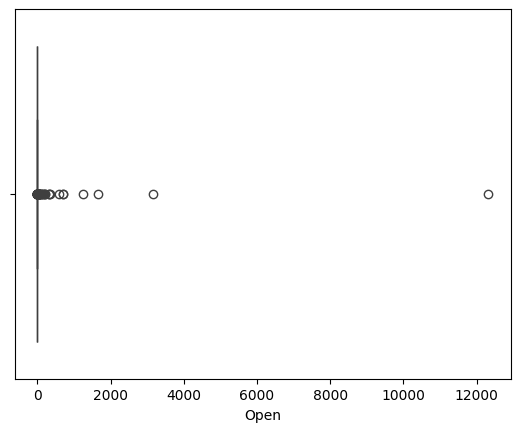

In [7]:
sns.boxplot(x=data_ticker_label['Open'])

<Axes: xlabel='Open'>

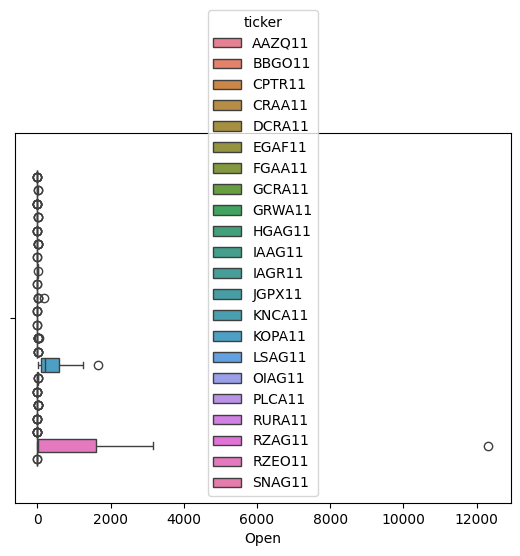

In [8]:
sns.boxplot(x=data_ticker_label['Open'],hue=data_ticker_label['ticker'])

<Axes: xlabel='Open', ylabel='Count'>

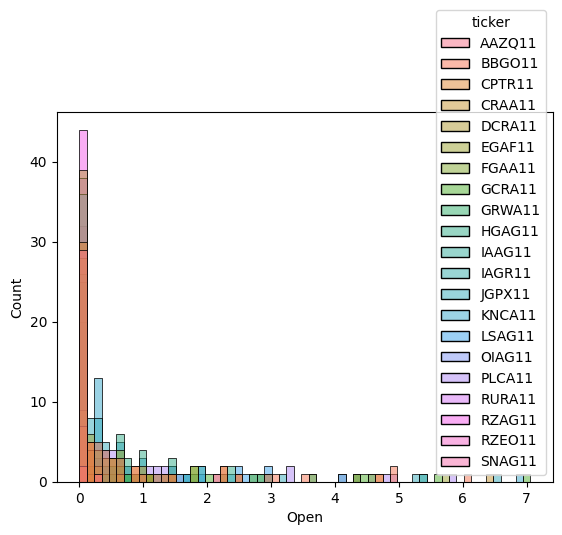

In [9]:
graph_data_ticker = data_ticker_label[data_ticker_label['Open'] < 8]
sns.histplot(x=graph_data_ticker['Open'], hue=graph_data_ticker['ticker'])

<Axes: xlabel='Open'>

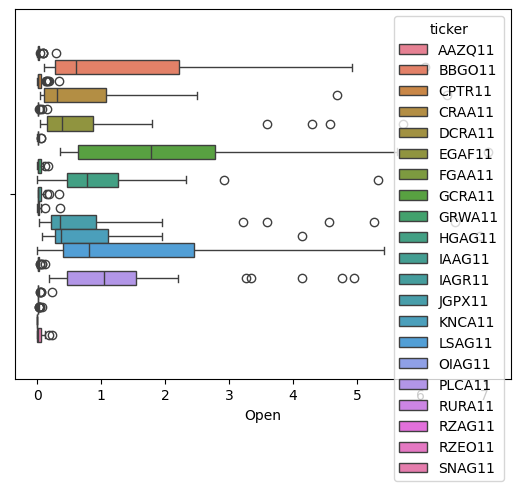

In [10]:
sns.boxplot(x=graph_data_ticker['Open'],hue=graph_data_ticker['ticker'])

In [11]:
tickers = data_ticker_label['ticker'].unique()
tickers

array(['AAZQ11', 'BBGO11', 'CPTR11', 'CRAA11', 'DCRA11', 'EGAF11',
       'FGAA11', 'GCRA11', 'GRWA11', 'HGAG11', 'IAAG11', 'IAGR11',
       'JGPX11', 'KNCA11', 'KOPA11', 'LSAG11', 'OIAG11', 'PLCA11',
       'RURA11', 'RZAG11', 'RZEO11', 'SNAG11'], dtype=object)

In [12]:
# Baixar os dados do índice
indice = yf.download(tickers=['XFIX11.SA'], multi_level_index=False)
# indice.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
indice = indice.drop(columns=['Close', 'Volume', 'Low', 'High'])
indice.columns = ['index']
# Criar o dataframe beta
print(indice.columns)
variance_index = indice['index'].var()
beta = pd.DataFrame()
drawdown = pd.DataFrame()
# Iterar sobre os tickers
for ticker in tickers:
    # Baixar os dados do ticker
    print(ticker)
    ticker_data = yf.download(tickers=[ticker+'.SA'], multi_level_index=False)
    # usando ticker_data calcule drawdown
    low = ticker_data['Low'].reset_index()
    low['Date'] = low['Date'].dt.to_period('M')
    low = low.groupby(low['Date']).min()
    high = ticker_data['High'].reset_index()
    high['Date'] = high['Date'].dt.to_period('M')
    high = high.groupby(high['Date']).max()
    drawdown_in_loop = (high['High'] - low['Low']) / high['High']
    drawdown_in_loop = drawdown_in_loop.reset_index()
    drawdown_in_loop['ticker'] = ticker
    drawdown = pd.concat([drawdown, drawdown_in_loop], ignore_index=True)
    # Resetar o índice para garantir que as datas sejam alinhadas corretamente
    ticker_data = ticker_data.drop(columns=['Close', 'Volume', 'Low', 'High'])
    ticker_data.columns = ['ticker']
    merge_index_ticker = pd.merge(indice, ticker_data, on='Date', how='inner')
    cov = merge_index_ticker['ticker'].cov(merge_index_ticker['index'])
    print(f"Covariância entre {ticker} e o índice: {cov}")
    beta_calculated = cov / variance_index
    print(f"Beta de {ticker}: {beta_calculated}")
    beta = pd.concat([pd.DataFrame({'ticker': [ticker], 'Beta': [beta_calculated]}), beta], ignore_index=True)
    # # Mesclar os dados do índice e do ticker para alinhamento
    # merged_data = pd.merge(indice[['Date', 'Open']], ticker_data[['Date', 'Open']], on='Date', suffixes=('_indice', '_ticker'))
    
    # # Calcular a covariância acumulada até cada mês
    # merged_data['Month'] = merged_data['Date'].dt.to_period('M')
    # for month in merged_data['Month'].unique():
    #     monthly_data = merged_data[merged_data['Month'] <= month]
    #     covariance = monthly_data['Open_ticker'].cov(monthly_data['Open_indice'])
    #     beta = beta.append({'Ticker': ticker, 'Month': month, 'Covariance': covariance}, ignore_index=True)

# Exibir o dataframe beta
beta

[*********************100%***********************]  1 of 1 completed


Index(['index'], dtype='object')
AAZQ11


[*********************100%***********************]  1 of 1 completed


Covariância entre AAZQ11 e o índice: 0.11350163791980858
Beta de AAZQ11: 0.1513689630258559
BBGO11


[*********************100%***********************]  1 of 1 completed


Covariância entre BBGO11 e o índice: 4.984334533218253
Beta de BBGO11: 6.647248123417063
CPTR11


[*********************100%***********************]  1 of 1 completed


Covariância entre CPTR11 e o índice: 1.733137570194147
Beta de CPTR11: 2.3113608013902924
CRAA11


[*********************100%***********************]  1 of 1 completed


Covariância entre CRAA11 e o índice: 2.4548079058683494
Beta de CRAA11: 3.2738005719485357
DCRA11


[*********************100%***********************]  1 of 1 completed


Covariância entre DCRA11 e o índice: 0.34229225190632445
Beta de DCRA11: 0.45649053328597783
EGAF11


[*********************100%***********************]  1 of 1 completed


Covariância entre EGAF11 e o índice: 6.107284396890067
Beta de EGAF11: 8.144845510638234
FGAA11


[*********************100%***********************]  1 of 1 completed


Covariância entre FGAA11 e o índice: 0.14674758113771474
Beta de FGAA11: 0.19570668397809846
GCRA11


[*********************100%***********************]  1 of 1 completed


Covariância entre GCRA11 e o índice: 2.0500842746853056
Beta de GCRA11: 2.7340498028228986
GRWA11


[*********************100%***********************]  1 of 1 completed


Covariância entre GRWA11 e o índice: 0.34633190996593904
Beta de GRWA11: 0.4618779344078447
HGAG11


[*********************100%***********************]  1 of 1 completed


Covariância entre HGAG11 e o índice: -6.178861695171877
Beta de HGAG11: -8.240303000201202
IAAG11


[*********************100%***********************]  1 of 1 completed


Covariância entre IAAG11 e o índice: 0.14128339292981346
Beta de IAAG11: 0.1884194895554726
IAGR11


[*********************100%***********************]  1 of 1 completed


Covariância entre IAGR11 e o índice: -0.14271234135166366
Beta de IAGR11: -0.19032517518959285
JGPX11


[*********************100%***********************]  1 of 1 completed


Covariância entre JGPX11 e o índice: 2.9694373346558067
Beta de JGPX11: 3.9601247907512924
KNCA11


[*********************100%***********************]  1 of 1 completed


Covariância entre KNCA11 e o índice: 5.591078965549039
Beta de KNCA11: 7.456419490692937
KOPA11


[*********************100%***********************]  1 of 1 completed


Covariância entre KOPA11 e o índice: 10.475529903632262
Beta de KOPA11: 13.970460054325127
LSAG11


[*********************100%***********************]  1 of 1 completed


Covariância entre LSAG11 e o índice: 0.799613729582509
Beta de LSAG11: 1.06638726353585
OIAG11


[*********************100%***********************]  1 of 1 completed


Covariância entre OIAG11 e o índice: 0.12280189718528808
Beta de OIAG11: 0.1637720492428307
PLCA11


[*********************100%***********************]  1 of 1 completed


Covariância entre PLCA11 e o índice: 0.8352164497734188
Beta de PLCA11: 1.1138680482625452
RURA11


[*********************100%***********************]  1 of 1 completed


Covariância entre RURA11 e o índice: 0.40585122091489767
Beta de RURA11: 0.5412545543710091
RZAG11


[*********************100%***********************]  1 of 1 completed


Covariância entre RZAG11 e o índice: 0.47761220375140123
Beta de RZAG11: 0.6369570108003366
RZEO11


[*********************100%***********************]  1 of 1 completed


Covariância entre RZEO11 e o índice: -0.6229380032126235
Beta de RZEO11: -0.8307675669166338
SNAG11


[*********************100%***********************]  1 of 1 completed

Covariância entre SNAG11 e o índice: 1.4910710351263532
Beta de SNAG11: 1.9885340909743436


ticker       Beta
0   SNAG11   1.988534
1   RZEO11  -0.830768
2   RZAG11   0.636957
3   RURA11   0.541255
4   PLCA11   1.113868
5   OIAG11   0.163772
6   LSAG11   1.066387
7   KOPA11  13.970460
8   KNCA11   7.456419
9   JGPX11   3.960125
10  IAGR11  -0.190325
11  IAAG11   0.188419
12  HGAG11  -8.240303
13  GRWA11   0.461878
14  GCRA11   2.734050
15  FGAA11   0.195707
16  EGAF11   8.144846
17  DCRA11   0.456491
18  CRAA11   3.273801
19  CPTR11   2.311361
20  BBGO11   6.647248
21  AAZQ11   0.151369

In [13]:
beta.loc[beta['Beta'] < 0].sort_values(by='Beta', ascending=False)

ticker      Beta
10  IAGR11 -0.190325
1   RZEO11 -0.830768
12  HGAG11 -8.240303

In [14]:
beta.loc[(beta['Beta'] > 0) & (beta['Beta']<1)].sort_values(by='Beta', ascending=False)

ticker      Beta
2   RZAG11  0.636957
3   RURA11  0.541255
13  GRWA11  0.461878
17  DCRA11  0.456491
15  FGAA11  0.195707
11  IAAG11  0.188419
5   OIAG11  0.163772
21  AAZQ11  0.151369

In [15]:
beta.loc[beta['Beta']>1].sort_values(by='Beta', ascending=False)

ticker       Beta
7   KOPA11  13.970460
16  EGAF11   8.144846
8   KNCA11   7.456419
20  BBGO11   6.647248
9   JGPX11   3.960125
18  CRAA11   3.273801
14  GCRA11   2.734050
19  CPTR11   2.311361
0   SNAG11   1.988534
4   PLCA11   1.113868
6   LSAG11   1.066387

In [16]:
drawdown.columns = ['Date','drawdown','ticker']
drawdown

Date  drawdown  ticker
0    2022-12  0.078431  AAZQ11
1    2023-01  0.097000  AAZQ11
2    2023-02  0.102218  AAZQ11
3    2023-03  0.042424  AAZQ11
4    2023-04  0.049281  AAZQ11
..       ...       ...     ...
704  2025-01  0.061458  SNAG11
705  2025-02  0.034085  SNAG11
706  2025-03  0.025779  SNAG11
707  2025-04  0.066008  SNAG11
708  2025-05  0.017580  SNAG11

[709 rows x 3 columns]

In [17]:
index = yf.download('XFIX11.SA',multi_level_index=False,).reset_index()
index['Date'] = index['Date'].dt.to_period('M')
index_variance = index.groupby(by='Date').var()
index_variance = index_variance.drop(columns=['Close','High','Low','Volume']).reset_index()
index_variance

[*********************100%***********************]  1 of 1 completed


Date      Open
0   2021-01  0.000541
1   2021-02  0.001153
2   2021-03  0.008575
3   2021-04  0.001075
4   2021-05  0.000501
5   2021-06  0.023019
6   2021-07  0.014736
7   2021-08  0.020445
8   2021-09  0.006156
9   2021-10  0.018042
10  2021-11  0.026989
11  2021-12  0.076505
12  2022-01  0.004193
13  2022-02  0.040703
14  2022-03  0.003514
15  2022-04  0.004089
16  2022-05  0.003739
17  2022-06  0.001716
18  2022-07  0.003806
19  2022-08  0.038206
20  2022-09  0.003615
21  2022-10  0.001462
22  2022-11  0.043925
23  2022-12  0.022613
24  2023-01  0.005758
25  2023-02  0.003559
26  2023-03  0.007378
27  2023-04  0.009904
28  2023-05  0.039786
29  2023-06  0.018495
30  2023-07  0.001443
31  2023-08  0.002124
32  2023-09  0.002559
33  2023-10  0.002986
34  2023-11  0.004641
35  2023-12  0.021906
36  2024-01  0.002746
37  2024-02  0.000814
38  2024-03  0.002342
39  2024-04  0.006919
40  2024-05  0.003546
41  2024-06  0.012033
42  2024-07  0.013060
43  2024-08  0.005685
44  2024-09  0.013765
45  2024-10  0.022042
46  2024-11  0.010070
47  2024-12  0.076209
48  2025-01  0.045016
49  2025-02  0.027763
50  2025-03  0.044914
51  2025-04  0.032415
52  2025-05  0.007275

In [18]:
marge_index = pd.merge(beta,data_ticker_label,on=['ticker'],how='right')
marge_index

ticker      Beta     Date      Open
0    AAZQ11  0.151369  2022-12  0.010953
1    AAZQ11  0.151369  2023-01  0.013980
2    AAZQ11  0.151369  2023-02  0.003219
3    AAZQ11  0.151369  2023-03  0.001403
4    AAZQ11  0.151369  2023-04  0.006455
..      ...       ...      ...       ...
704  SNAG11  1.988534  2025-01  0.014564
705  SNAG11  1.988534  2025-02  0.007799
706  SNAG11  1.988534  2025-03  0.002538
707  SNAG11  1.988534  2025-04  0.020092
708  SNAG11  1.988534  2025-05  0.000621

[709 rows x 4 columns]

In [19]:
marge_index.dropna()

ticker      Beta     Date      Open
0    AAZQ11  0.151369  2022-12  0.010953
1    AAZQ11  0.151369  2023-01  0.013980
2    AAZQ11  0.151369  2023-02  0.003219
3    AAZQ11  0.151369  2023-03  0.001403
4    AAZQ11  0.151369  2023-04  0.006455
..      ...       ...      ...       ...
704  SNAG11  1.988534  2025-01  0.014564
705  SNAG11  1.988534  2025-02  0.007799
706  SNAG11  1.988534  2025-03  0.002538
707  SNAG11  1.988534  2025-04  0.020092
708  SNAG11  1.988534  2025-05  0.000621

[705 rows x 4 columns]

In [20]:
marge_index = pd.merge(marge_index,drawdown,on=['ticker','Date'],how='right')
marge_index['Label'] = (marge_index['Beta'] + marge_index['Open'] + marge_index['drawdown']) / 3
marge_index.dropna(inplace=True)
marge_index

ticker      Beta     Date      Open  drawdown     Label
0    AAZQ11  0.151369  2022-12  0.010953  0.078431  0.080251
1    AAZQ11  0.151369  2023-01  0.013980  0.097000  0.087450
2    AAZQ11  0.151369  2023-02  0.003219  0.102218  0.085602
3    AAZQ11  0.151369  2023-03  0.001403  0.042424  0.065065
4    AAZQ11  0.151369  2023-04  0.006455  0.049281  0.069035
..      ...       ...      ...       ...       ...       ...
704  SNAG11  1.988534  2025-01  0.014564  0.061458  0.688186
705  SNAG11  1.988534  2025-02  0.007799  0.034085  0.676806
706  SNAG11  1.988534  2025-03  0.002538  0.025779  0.672284
707  SNAG11  1.988534  2025-04  0.020092  0.066008  0.691545
708  SNAG11  1.988534  2025-05  0.000621  0.017580  0.668912

[705 rows x 6 columns]

In [105]:
if len(marge_index) > 0:
    marge_index.to_csv("./../assets/marge_index.csv")
else:
    marge_index = pd.read_csv("./../assets/marge_index.csv")

In [21]:
marge_index.loc[marge_index['Label'] < 0]

ticker      Beta     Date      Open  drawdown     Label
287  HGAG11 -8.240303  2022-08  0.005052  0.002896 -2.744118
288  HGAG11 -8.240303  2022-09  1.215333  0.101449 -2.307840
289  HGAG11 -8.240303  2022-10  0.001196  0.005792 -2.744439
290  HGAG11 -8.240303  2022-11  2.326360  0.131106 -1.927612
291  HGAG11 -8.240303  2022-12  5.324797  0.093684 -0.940607
293  HGAG11 -8.240303  2023-02  2.921929  0.222963 -1.698470
295  HGAG11 -8.240303  2023-04  1.450230  0.227273 -2.187600
296  HGAG11 -8.240303  2023-05  2.328078  0.178810 -1.911138
297  HGAG11 -8.240303  2023-06  0.647483  0.180930 -2.470630
298  HGAG11 -8.240303  2023-07  1.412277  0.230697 -2.199110
299  HGAG11 -8.240303  2023-08  0.775776  0.163488 -2.433680
300  HGAG11 -8.240303  2023-09  0.030872  0.033019 -2.725471
301  HGAG11 -8.240303  2023-10  0.185364  0.119171 -2.645256
302  HGAG11 -8.240303  2023-11  0.095928  0.140817 -2.667853
303  HGAG11 -8.240303  2023-12  1.008529  0.226939 -2.334945
304  HGAG11 -8.240303  2024-01  0.939117  0.240860 -2.353442
305  HGAG11 -8.240303  2024-02  1.450809  0.179000 -2.203498
306  HGAG11 -8.240303  2024-03  0.397200  0.139638 -2.567822
307  HGAG11 -8.240303  2024-04  0.673975  0.158034 -2.469431
308  HGAG11 -8.240303  2024-05  1.754379  0.304651 -2.060424
309  HGAG11 -8.240303  2024-06  0.176040  0.126286 -2.645993
310  HGAG11 -8.240303  2024-07  0.626098  0.158592 -2.485204
311  HGAG11 -8.240303  2024-08  0.768550  0.174087 -2.432555
312  HGAG11 -8.240303  2024-09  0.597700  0.203181 -2.479807
313  HGAG11 -8.240303  2024-10  0.583559  0.159341 -2.499135
314  HGAG11 -8.240303  2024-11  1.107757  0.313894 -2.272884
315  HGAG11 -8.240303  2024-12  0.693030  0.255208 -2.430688
316  HGAG11 -8.240303  2025-01  0.254549  0.278997 -2.568919
317  HGAG11 -8.240303  2025-02  0.484389  0.306154 -2.483254
318  HGAG11 -8.240303  2025-03  1.020726  0.224026 -2.331850
319  HGAG11 -8.240303  2025-04  1.020646  0.268129 -2.317176
320  HGAG11 -8.240303  2025-05  0.778170  0.132554 -2.443193
344  IAGR11 -0.190325  2023-02  0.003972  0.059906 -0.042149
345  IAGR11 -0.190325  2023-03  0.001302  0.048563 -0.046820
346  IAGR11 -0.190325  2023-04  0.020759  0.122658 -0.015636
347  IAGR11 -0.190325  2023-05  0.000906  0.052616 -0.045601
348  IAGR11 -0.190325  2023-06  0.000395  0.020103 -0.056609
349  IAGR11 -0.190325  2023-07  0.032938  0.095754 -0.020544
350  IAGR11 -0.190325  2023-08  0.003246  0.044205 -0.047625
351  IAGR11 -0.190325  2023-09  0.030371  0.067182 -0.030924
352  IAGR11 -0.190325  2023-10  0.024756  0.080533 -0.028345
356  IAGR11 -0.190325  2024-02  0.011750  0.113949 -0.021542
358  IAGR11 -0.190325  2024-04  0.009373  0.163415 -0.005846
361  IAGR11 -0.190325  2024-07  0.012517  0.145349 -0.010820
362  IAGR11 -0.190325  2024-08  0.015236  0.143678 -0.010470
363  IAGR11 -0.190325  2024-09  0.013990  0.129944 -0.015464
364  IAGR11 -0.190325  2024-10  0.013670  0.156156 -0.006833
365  IAGR11 -0.190325  2024-11  0.007186  0.124204 -0.019645
366  IAGR11 -0.190325  2024-12  0.011678  0.148936 -0.009904
369  IAGR11 -0.190325  2025-03  0.010199  0.115196 -0.021643
370  IAGR11 -0.190325  2025-04  0.001672  0.038835 -0.049940
371  IAGR11 -0.190325  2025-05  0.010608  0.155405 -0.008104
668  RZEO11 -0.830768  2024-08  0.000208  0.000165 -0.276798
670  RZEO11 -0.830768  2024-10  0.000000  0.000000 -0.276923
674  RZEO11 -0.830768  2025-05  0.000000  0.000000 -0.276923

In [22]:
marge_index.describe()

Beta          Open    drawdown        Label
count  705.000000    705.000000  705.000000   705.000000
mean     2.109932     32.762367    0.082226    11.651508
std      3.919251    487.220711    0.068404   162.453539
min     -8.240303      0.000000    0.000000    -2.744439
25%      0.195707      0.007046    0.040074     0.158191
50%      1.066387      0.074604    0.061404     0.555179
75%      3.960125      0.648142    0.104654     1.784090
max     13.970460  12317.899726    0.753073  4105.899263

In [23]:
marge_index.loc[marge_index['Label'].isna()]

Empty DataFrame
Columns: [ticker, Beta, Date, Open, drawdown, Label]
Index: []

<Axes: xlabel='Label', ylabel='Count'>

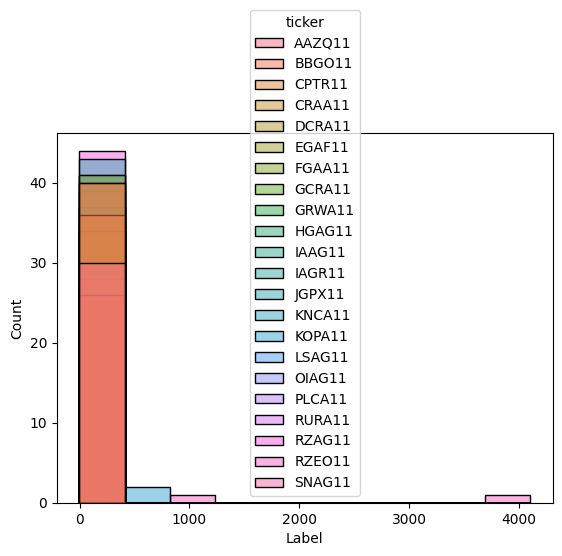

In [24]:
sns.histplot(x=marge_index['Label'],bins=10, hue=marge_index['ticker'])

In [25]:
cut_label = pd.qcut(marge_index['Label'],2)

<Axes: xlabel='Label'>

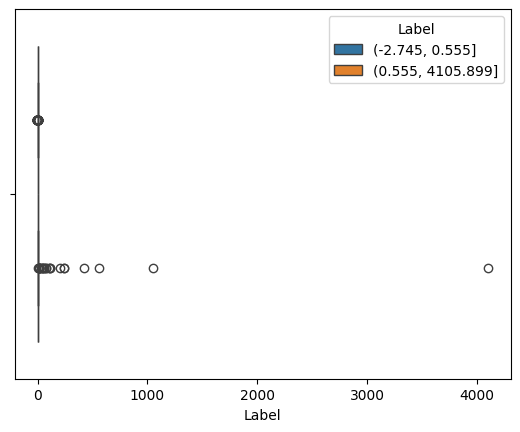

In [26]:
sns.boxplot(x=marge_index['Label'], hue=cut_label)

In [27]:
marge_index['Beta'].describe()

count    705.000000
mean       2.109932
std        3.919251
min       -8.240303
25%        0.195707
50%        1.066387
75%        3.960125
max       13.970460
Name: Beta, dtype: float64

In [28]:
marge_index.columns

Index(['ticker', 'Beta', 'Date', 'Open', 'drawdown', 'Label'], dtype='object')

In [29]:
rotulo = marge_index.drop(columns=['drawdown','Open','Beta'])

### Dados de Mudanças de preços

### Dados mensais

In [30]:
mensal = pd.read_csv('./../assets/mes_data.csv')

# mensal['Data da Informação sobre detalhamento do número de cotistas¹']
mensal['Data'] = pd.to_datetime(mensal['Data da Informação sobre detalhamento do número de cotistas¹'],dayfirst=True,errors='coerce')
mensal.drop(columns=['Data da Informação sobre detalhamento do número de cotistas¹'])

Unnamed: 0 ticker  Número de cotistas  Pessoa física  \
0             0   AAZQ              30.136         30.080   
1             1   AAZQ              29.754          0.000   
2             2   AAZQ              29.430          0.000   
3             3   AAZQ              27.954         27.899   
4             4   AAZQ              28.223          0.000   
..          ...    ...                 ...            ...   
888         888   XPCA               8.496          0.000   
889         889   XPCA               6.546          6.498   
890         890   XPCA               5.386          0.000   
891         891   XPCA               4.546          0.000   
892         892   XPCA               3.725          3.684   

     Pessoa jurídica não financeira  Banco comercial  \
0                              46.0              0.0   
1                               0.0              0.0   
2                               0.0              0.0   
3                              48.0              0.0   
4                               0.0              0.0   
..                              ...              ...   
888                             0.0              0.0   
889                            47.0              0.0   
890                             0.0              0.0   
891                             0.0              0.0   
892                            39.0              0.0   

     Corretora ou distribuidora  Outras pessoas jurídicas financeiras  \
0                           0.0                                   4.0   
1                           0.0                                   0.0   
2                           0.0                                   0.0   
3                           0.0                                   0.0   
4                           0.0                                   0.0   
..                          ...                                   ...   
888                         0.0                                   0.0   
889                         0.0                                   0.0   
890                         0.0                                   0.0   
891                         0.0                                   0.0   
892                         0.0                                   0.0   

     Investidores não residentes  Entidade aberta de previdência complementar  \
0                            5.0                                          0.0   
1                            0.0                                          0.0   
2                            0.0                                          0.0   
3                            6.0                                          0.0   
4                            0.0                                          0.0   
..                           ...                                          ...   
888                          0.0                                          0.0   
889                          1.0                                          0.0   
890                          0.0                                          0.0   
891                          0.0                                          0.0   
892                          2.0                                          0.0   

     ...  Total dos Passivos  Valor total dos imóveis objeto de ônus reais  \
0    ...        2.527.467,07                                          0,00   
1    ...        2.533.303,79                                          0,00   
2    ...                   0                                             0   
3    ...                   0                                             0   
4    ...                   0                                             0   
..   ...                 ...                                           ...   
888  ...                   0                                             0   
889  ...                   0                                             0   
890  ...                   0                   

# Fazer o rôtulo
Variação
Beta = Varição do ativo / Variação do indice
Rótulo = Beta * Variação * Resultado do próximo quarter(trimestre)

In [31]:
mensal['Ano_Quarter'] = mensal['Data'].dt.strftime('%Y') + '-' + mensal['Data'].dt.quarter.astype(str)
mensal['Ano_Quarter'] = mensal['Ano_Quarter'].str[:-2]
mensal['Ano_Quarter']


0      2024-3
1      2024-3
2      2024-3
3      2024-2
4      2024-2
        ...  
888    2022-2
889    2022-1
890    2022-1
891    2022-1
892    2021-4
Name: Ano_Quarter, Length: 893, dtype: object

### Remover colunas Unnamed de mensal e trmestral

In [32]:
mensal[mensal.isna()] = 0
mensal

/tmp/ipykernel_10721/3613130871.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  mensal[mensal.isna()] = 0


Unnamed: 0 ticker  \
0             0   AAZQ   
1             1   AAZQ   
2             2   AAZQ   
3             3   AAZQ   
4             4   AAZQ   
..          ...    ...   
888         888   XPCA   
889         889   XPCA   
890         890   XPCA   
891         891   XPCA   
892         892   XPCA   

    Data da Informação sobre detalhamento do número de cotistas¹  \
0                                           30/09/2024             
1                                           30/08/2024             
2                                           31/07/2024             
3                                           28/06/2024             
4                                           31/05/2024             
..                                                 ...             
888                                         29/04/2022             
889                                         31/03/2022             
890                                         25/02/2022             
891                                         31/01/2022             
892                                         31/12/2021             

     Número de cotistas  Pessoa física  Pessoa jurídica não financeira  \
0                30.136         30.080                            46.0   
1                29.754          0.000                             0.0   
2                29.430          0.000                             0.0   
3                27.954         27.899                            48.0   
4                28.223          0.000                             0.0   
..                  ...            ...                             ...   
888               8.496          0.000                             0.0   
889               6.546          6.498                            47.0   
890               5.386          0.000                             0.0   
891               4.546          0.000                             0.0   
892               3.725          3.684                            39.0   

     Banco comercial  Corretora ou distribuidora  \
0                0.0                         0.0   
1                0.0                         0.0   
2                0.0                         0.0   
3                0.0                         0.0   
4                0.0                         0.0   
..               ...                         ...   
888              0.0                         0.0   
889              0.0                         0.0   
890              0.0                         0.0   
891              0.0                         0.0   
892              0.0                         0.0   

     Outras pessoas jurídicas financeiras  Investidores não residentes  ...  \
0                                     4.0                          5.0  ...   
1                                     0.0                          0.0  ...   
2                                     0.0                          0.0  ...   
3                                     0.0                          6.0  ...   
4                                     0.0                          0.0  ...   
..                                    ...                          ...  ...   
888                                   0.0                          0.0  ...   
889                                   0.0                          1.0  ...   
890                                   0.0                          0.0  ...   
891                                   0.0                          0.0  ...   
892                                   0.0                          2.0  ...   

     Total dos Passivos  Valor total dos imóveis objeto de ônus reais  \
0          2.527.467,07                                          0,00   
1          2.533.303,79                                          0,00   
2                     0                                             0   
3                     0                                             0   
4                     0                        

In [33]:
mensal['Dividend Yield do Mês de Referência³ (%)']

0      1.0926
1      1.0933
2      1.0945
3      1.1660
4      1.1655
        ...  
888    1.4666
889    1.4620
890    1.1514
891    1.0461
892    0.8371
Name: Dividend Yield do Mês de Referência³ (%), Length: 893, dtype: float64

In [34]:
# mensal.to_csv('../assets/mes_data.csv')
# for column in mensal.columns.tolist():
#     print(colum)
#     if colum not in ['Mount','Dividend Yield do Mês de Referência³ (%)']:
#         print(colum)
#         mensal[colum] = mensal[colum].astype(str).replace(".","").replace(',','.')
mensal.columns.tolist()

['Unnamed: 0',
 'ticker',
 'Data da Informação sobre detalhamento do número de cotistas¹',
 'Número de cotistas',
 'Pessoa física',
 'Pessoa jurídica não financeira',
 'Banco comercial',
 'Corretora ou distribuidora',
 'Outras pessoas jurídicas financeiras',
 'Investidores não residentes',
 'Entidade aberta de previdência complementar',
 'Entidade fechada de previdência complementar',
 'Regime próprio de previdência dos servidores públicos',
 'Sociedade seguradora ou resseguradora',
 'Sociedade de capitalização e de arrendamento mercantil',
 'Fundos de investimento imobiliário',
 'Outros fundos de investimento',
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)',
 'Outros tipos de cotistas não relacionados',
 'Ativo – R$',
 'Patrimônio Líquido – R$',
 'Número de Cotas Emitidas',
 'Valor Patrimonial das Cotas – R$',
 'Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)',
 'Despesas com o agente custodiante em relação ao patrimônio líquid

In [35]:
trimestre = pd.read_csv('../assets/dados1.csv')
trimestre

Unnamed: 0                                       NomedoFundo:  \
0             0  AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...   
1             1  AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...   
2             2  AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...   
3             3  AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...   
4             4  AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...   
..          ...                                                ...   
307         307  XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...   
308         308  XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...   
309         309  XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...   
310         310  XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...   
311         311  XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...   

           CNPJdoFundo: DatadeFuncionamento:            PúblicoAlvo:  \
0    44.625.826/0001-11           2022-08-22  InvestidorProfissional   
1    44.625.826/0001-11           2022-08-22  InvestidorProfissional   
2    44.625.826/0001-11           2022-08-22     InvestidoresemGeral   
3    44.625.826/0001-11           2022-08-22     InvestidoresemGeral   
4    44.625.826/0001-11           2022-08-22     InvestidoresemGeral   
..                  ...                  ...                     ...   
307  41.269.527/0001-01           2021-11-04     InvestidoresemGeral   
308  41.269.527/0001-01           2021-11-04     InvestidoresemGeral   
309  41.269.527/0001-01           2021-11-04     InvestidoresemGeral   
310  41.269.527/0001-01           2021-11-04     InvestidoresemGeral   
311  41.269.527/0001-01           2021-11-04     InvestidoresemGeral   

      CódigoISIN: Quantidadedecotasemitidas: FundoExclusivo?  \
0    BRAAZQCTF001              24.037.284,00             Não   
1    BRAAZQCTF001              24.037.284,00             Não   
2    BRAAZQCTF001              24.037.284,00             Não   
3    BRAAZQCTF001              24.037.284,00             Não   
4    BRAAZQCTF001              24.037.284,00             Não   
..            ...                        ...             ...   
307  BRXPCACTF004              21.475.895,00             Não   
308  BRXPCACTF004              15.885.723,00             Não   
309  BRXPCACTF004              14.092.466,00             Não   
310  BRXPCACTF004              14.092.466,00             Não   
311  BRXPCACTF004              14.092.466,00             Não   

    Cotistaspossuemvínculofamiliarousocietáriofamiliar?  \
0                                                  Não    
1                                                  Não    
2                                                  Não    
3                                                  Não    
4                                                  Não    
..                                                 ...    
307                                                Não    
308                                                Não    
309                                                Não    
310                                                Não    
311                                                Não    

                          Classificaçãoautorregulação:  ...  \
0    Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   
1    Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   
2    Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   
3    Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   
4    Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   
..                                                 ...  ...   
307  Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   
308  Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   
309  Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   
310  Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   
311  Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   

     Rendimentos declarados  \
0              1.658573e+10   
1 

In [36]:
for i in trimestre.columns:
    print(i)

Unnamed: 0
NomedoFundo:
CNPJdoFundo:
DatadeFuncionamento:
PúblicoAlvo:
CódigoISIN:
Quantidadedecotasemitidas:
FundoExclusivo?
Cotistaspossuemvínculofamiliarousocietáriofamiliar?
Classificaçãoautorregulação:
PrazodeDuração:
DatadoPrazodeDuração:
Encerramentodoexercíciosocial:
Mercadodenegociaçãodascotas:
Entidadeadministradorademercadoorganizado:
NomedoAdministrador:
CNPJdoAdministrador:
Endereço:
Telefones:
Site:
E-mail:
Competência:
DatadeEncerramentodoTrimestre:
OFundoseenquadranadefiniçãodanota"6":
Resultadocontábil/financeirotrimestrallíquido_financeiro
Resultadocontábil/financeirotrimestrallíquido_contabil
(-)Taxadeadministração_financeiro
(-)Taxadeadministração_contabil
(-)Taxadedesempenho(performance)_financeiro
(-)Taxadedesempenho(performance)_contabil
(-)Consultoriaespecializadadequetrataoart.31,II,ICVM472_financeiro
(-)Consultoriaespecializadadequetrataoart.31,II,ICVM472_contabil
(-)Empresaespecializadadequetrataoart.31,III,ICVM472_financeiro
(-)Empresaespecializadadequetrata

In [37]:
# trimestre['DatadeEncerramentodoTrimestre:'] = pd.to_datetime(trimestre['DatadeEncerramentodoTrimestre:'])
# trimestre['DatadeFuncionamento:'] = pd.to_datetime(trimestre['DatadeFuncionamento:'])
# trimestre.to_csv('../assets/dados1.csv')


In [38]:
str(trimestre['NomedoFundo:'].unique().tolist())

"['AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUTIVASDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO', 'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISEXESARAGUAIA-FIAGRO-IMOBILIÁRIO', 'BBFUNDODEINVESTIMENTODECRÉDITOFIAGRO-IMOBILIÁRIO', 'CAPITANIAAGROSTRATEGIES-FIAGRO-IMOBILIÁRIO', 'SPARTAFIAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-IMOBILIÁRIO', 'DEVANTFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', 'ECOAGROIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', 'FG/AGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', '051AGROFAZENDASIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISFIAGROIMOBILIARIO', '051AGROFAZENDASIIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOB', 'GALAPAGOSRECEBÍVEISDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO', 'GREENWICHAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', 'HIGHFUNDODEINVESTIMENTOAGRO-FIAGRO-IMOBILIÁRIO', 'INTERAMERRA-FIA

In [39]:
dict_nome_ticker= {
    'AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUTIVASDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO': 'AAZQ', 
    'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISEXESARAGUAIA-FIAGRO-IMOBILIÁRIO': 'AGRX', 
    'BBFUNDODEINVESTIMENTODECRÉDITOFIAGRO-IMOBILIÁRIO': 'BBGO', 
    'CAPITANIAAGROSTRATEGIES-FIAGRO-IMOBILIÁRIO': 'CPTR', 
    'SPARTAFIAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-IMOBILIÁRIO': 'CRAA', 
    'DEVANTFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'DCRA', 
    'ECOAGROIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'EGAF', 
    'FG/AGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'FGAA', 
    '051AGROFAZENDASIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISFIAGROIMOBILIARIO': 'FLEM', 
    '051AGROFAZENDASIIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOB': 'FZDA', 
    'GALAPAGOSRECEBÍVEISDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO': 'GCRA', 
    'GREENWICHAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'GRWA', 
    'HIGHFUNDODEINVESTIMENTOAGRO-FIAGRO-IMOBILIÁRIO': 'HGAG', 
    'INTERAMERRA-FIAGRO-IMOBILIÁRIO': 'IAAG', 
    'SFIINVESTIMENTOSDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO': 'IAGR', 
    'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISJGPCRÉDITO-FIAGRO-IMOBILIÁRIO': 'JGPX', 
    'KINEACRÉDITOAGROFIAGRO-IMOBILIÁRIO': 'KNCA', 
    'KINEAOPORTUNIDADESAGROIFIAGRO-IMOBILIÁRIO': 'KOPA', 
    'LESTEFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'KOPA', 
    'NCHRECEBÍVEISDOAGRONEGÓCIO-FIAGROIMOBILIÁRIO': 'NCRA', 
    'NCHEQIRECEBÍVEISDOAGRONEGÓCIO-FIAGROIMOBILIÁRIO': 'NCRA', 
    'OURINVESTINNOVATION-FIAGROIMOBILIÁRIO': 'OIAG', 
    'PLURALBRBCRÉDITOAGRO-FIAGRO-IMOBILIÁRIO': 'PLCA', 
    'ITAÚASSETRURALFIAGRO-IMOBILIÁRIO': 'RURA', 
    'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISRIZAAGRO-FIAGRO-IMOBILIÁRIO': 'RZAG', 
    'RIZAEOSFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISFIAGROIMOBILIÁRIO': 'RZEO', 
    'SUNOAGRO-FIAGRO-IMOBILIÁRIO': 'SNAG', 
    'VECTISDATAGROCRÉDITOAGRONEGÓCIO-FINASCADEIASPRODUTIVASAGROINDUSTRIAIS-IMOBILIÁRIO': 'VCRA', 
    'VALORACRAFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'VGIA', 
    'XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISIMOB.-FIAGRO-IMOB.': 'XPCA'
}

In [40]:
trimestre['ticker'] = trimestre['NomedoFundo:'].apply(lambda x: dict_nome_ticker.get(x))
trimestre['ticker'] 

0      AAZQ
1      AAZQ
2      AAZQ
3      AAZQ
4      AAZQ
       ... 
307    XPCA
308    XPCA
309    XPCA
310    XPCA
311    XPCA
Name: ticker, Length: 312, dtype: object

In [41]:
mensal.ticker

0      AAZQ
1      AAZQ
2      AAZQ
3      AAZQ
4      AAZQ
       ... 
888    XPCA
889    XPCA
890    XPCA
891    XPCA
892    XPCA
Name: ticker, Length: 893, dtype: object

In [42]:
trimestre['DatadeEncerramentodoTrimestre:'] = pd.to_datetime(trimestre['DatadeEncerramentodoTrimestre:'])
trimestre['Ano_Quarter'] = trimestre['DatadeEncerramentodoTrimestre:'].dt.year.astype(str) + "-" + trimestre['DatadeEncerramentodoTrimestre:'].dt.quarter.astype(str) 
# mensal['Ano_Quarter']
trimestre

Unnamed: 0                                       NomedoFundo:  \
0             0  AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...   
1             1  AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...   
2             2  AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...   
3             3  AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...   
4             4  AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...   
..          ...                                                ...   
307         307  XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...   
308         308  XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...   
309         309  XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...   
310         310  XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...   
311         311  XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...   

           CNPJdoFundo: DatadeFuncionamento:            PúblicoAlvo:  \
0    44.625.826/0001-11           2022-08-22  InvestidorProfissional   
1    44.625.826/0001-11           2022-08-22  InvestidorProfissional   
2    44.625.826/0001-11           2022-08-22     InvestidoresemGeral   
3    44.625.826/0001-11           2022-08-22     InvestidoresemGeral   
4    44.625.826/0001-11           2022-08-22     InvestidoresemGeral   
..                  ...                  ...                     ...   
307  41.269.527/0001-01           2021-11-04     InvestidoresemGeral   
308  41.269.527/0001-01           2021-11-04     InvestidoresemGeral   
309  41.269.527/0001-01           2021-11-04     InvestidoresemGeral   
310  41.269.527/0001-01           2021-11-04     InvestidoresemGeral   
311  41.269.527/0001-01           2021-11-04     InvestidoresemGeral   

      CódigoISIN: Quantidadedecotasemitidas: FundoExclusivo?  \
0    BRAAZQCTF001              24.037.284,00             Não   
1    BRAAZQCTF001              24.037.284,00             Não   
2    BRAAZQCTF001              24.037.284,00             Não   
3    BRAAZQCTF001              24.037.284,00             Não   
4    BRAAZQCTF001              24.037.284,00             Não   
..            ...                        ...             ...   
307  BRXPCACTF004              21.475.895,00             Não   
308  BRXPCACTF004              15.885.723,00             Não   
309  BRXPCACTF004              14.092.466,00             Não   
310  BRXPCACTF004              14.092.466,00             Não   
311  BRXPCACTF004              14.092.466,00             Não   

    Cotistaspossuemvínculofamiliarousocietáriofamiliar?  \
0                                                  Não    
1                                                  Não    
2                                                  Não    
3                                                  Não    
4                                                  Não    
..                                                 ...    
307                                                Não    
308                                                Não    
309                                                Não    
310                                                Não    
311                                                Não    

                          Classificaçãoautorregulação:  ...  \
0    Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   
1    Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   
2    Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   
3    Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   
4    Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   
..                                                 ...  ...   
307  Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   
308  Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   
309  Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   
310  Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   
311  Mandato:TítuloseValoresMobiliários\nSegmentode...  ...   

     Rendimento líquido a pagar remanescente no encerramento do 

In [43]:
trimestre['Ano_Quarter']

0      2024-2
1      2024-1
2      2023-4
3      2023-3
4      2023-2
        ...  
307    2022-3
308    2022-2
309    2022-1
310    2022-1
311    2021-4
Name: Ano_Quarter, Length: 312, dtype: object

In [44]:
mensal['Ano_Quarter']

0      2024-3
1      2024-3
2      2024-3
3      2024-2
4      2024-2
        ...  
888    2022-2
889    2022-1
890    2022-1
891    2022-1
892    2021-4
Name: Ano_Quarter, Length: 893, dtype: object

In [45]:
mensal.columns.tolist()

['Unnamed: 0',
 'ticker',
 'Data da Informação sobre detalhamento do número de cotistas¹',
 'Número de cotistas',
 'Pessoa física',
 'Pessoa jurídica não financeira',
 'Banco comercial',
 'Corretora ou distribuidora',
 'Outras pessoas jurídicas financeiras',
 'Investidores não residentes',
 'Entidade aberta de previdência complementar',
 'Entidade fechada de previdência complementar',
 'Regime próprio de previdência dos servidores públicos',
 'Sociedade seguradora ou resseguradora',
 'Sociedade de capitalização e de arrendamento mercantil',
 'Fundos de investimento imobiliário',
 'Outros fundos de investimento',
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)',
 'Outros tipos de cotistas não relacionados',
 'Ativo – R$',
 'Patrimônio Líquido – R$',
 'Número de Cotas Emitidas',
 'Valor Patrimonial das Cotas – R$',
 'Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)',
 'Despesas com o agente custodiante em relação ao patrimônio líquid

In [46]:
def convert_to_numeric(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    for column in columns:
        try:
            df[column] = df[column].astype(str)
            df[column] = df[column].str.replace("%", "")
            df[column] = df[column].str.replace(".", "")
            df[column] = df[column].str.replace(",", ".")
            df[column] = pd.to_numeric(df[column], errors='raise')
            print(f"Converted column {column} to numeric.")
        except Exception as e:
            print(f"Error converting column {column}: {e}")
    return df

In [47]:
mensal = convert_to_numeric(mensal, mensal.columns.tolist())

Converted column Unnamed: 0 to numeric.
Error converting column ticker: Unable to parse string "AAZQ" at position 0
Error converting column Data da Informação sobre detalhamento do número de cotistas¹: Unable to parse string "30/09/2024" at position 0
Converted column Número de cotistas to numeric.
Converted column Pessoa física to numeric.
Converted column Pessoa jurídica não financeira to numeric.
Converted column Banco comercial to numeric.
Converted column Corretora ou distribuidora to numeric.
Converted column Outras pessoas jurídicas financeiras to numeric.
Converted column Investidores não residentes to numeric.
Converted column Entidade aberta de previdência complementar to numeric.
Converted column Entidade fechada de previdência complementar to numeric.
Converted column Regime próprio de previdência dos servidores públicos to numeric.
Converted column Sociedade seguradora ou resseguradora to numeric.
Converted column Sociedade de capitalização e de arrendamento mercantil to n

In [48]:
mensal.dtypes

Unnamed: 0                                                        int64
ticker                                                           object
Data da Informação sobre detalhamento do número de cotistas¹     object
Número de cotistas                                                int64
Pessoa física                                                     int64
                                                                 ...   
Total do passivo                                                float64
Certificado de Recebíveis Imobiliários (CRI)                    float64
Letras de Crédito Imobiliário (LCI)                             float64
Data                                                             object
Ano_Quarter                                                      object
Length: 88, dtype: object

In [49]:
final = pd.merge(mensal,trimestre,'left',on=['Ano_Quarter','ticker'])
final

Unnamed: 0_x ticker  \
0                0   AAZQ   
1                1   AAZQ   
2                2   AAZQ   
3                3   AAZQ   
4                4   AAZQ   
...            ...    ...   
1066           890   XPCA   
1067           890   XPCA   
1068           891   XPCA   
1069           891   XPCA   
1070           892   XPCA   

     Data da Informação sobre detalhamento do número de cotistas¹  \
0                                            30/09/2024             
1                                            30/08/2024             
2                                            31/07/2024             
3                                            28/06/2024             
4                                            31/05/2024             
...                                                 ...             
1066                                         25/02/2022             
1067                                         25/02/2022             
1068                                         31/01/2022             
1069                                         31/01/2022             
1070                                         31/12/2021             

      Número de cotistas  Pessoa física  Pessoa jurídica não financeira  \
0                  30136           3008                             460   
1                  29754              0                               0   
2                   2943              0                               0   
3                  27954          27899                             480   
4                  28223              0                               0   
...                  ...            ...                             ...   
1066                5386              0                               0   
1067                5386              0                               0   
1068                4546              0                               0   
1069                4546              0                               0   
1070                3725           3684                             390   

      Banco comercial  Corretora ou distribuidora  \
0                   0                           0   
1                   0                           0   
2                   0                           0   
3                   0                           0   
4                   0                           0   
...               ...                         ...   
1066                0                           0   
1067                0                           0   
1068                0                           0   
1069                0                           0   
1070                0                           0   

      Outras pessoas jurídicas financeiras  Investidores não residentes  ...  \
0                                       40                           50  ...   
1                                        0                            0  ...   
2                                        0                            0  ...   
3                                        0                           60  ...   
4                                        0                            0  ...   
...                                    ...                          ...  ...   
1066                                     0                            0  ...   
1067                                     0                            0  ...   
1068                                     0                            0  ...   
1069                                     0                            0  ...   
1070                                     0                           20  ...   

       Rendimentos declarados  \
0                         NaN   
1                         NaN   
2                         NaN   
3                1.658573e+10   
4                1.658573e+10   
...                       ...   
1066             4.932363e+10   
1067             4.932363e+10   
1068             4.932363e+10   

In [50]:
final_date = pd.to_datetime(final['Data da Informação sobre detalhamento do número de cotistas¹'],'coerce')
final['Date'] = final_date.dt.to_period('M')
final['Date']

/tmp/ipykernel_10721/2064336292.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_date = pd.to_datetime(final['Data da Informação sobre detalhamento do número de cotistas¹'],'coerce')


0       2024-09
1       2024-08
2       2024-07
3       2024-06
4       2024-05
         ...   
1066    2022-02
1067    2022-02
1068    2022-01
1069    2022-01
1070    2021-12
Name: Date, Length: 1071, dtype: period[M]

In [51]:
columns_to_drop = list(filter(lambda column: 'Unnamed' in column,final.columns))
columns_to_drop.append('NaN')
columns_to_drop.append('0')
final = final.drop(columns=columns_to_drop)
final


ticker Data da Informação sobre detalhamento do número de cotistas¹  \
0      AAZQ                                         30/09/2024             
1      AAZQ                                         30/08/2024             
2      AAZQ                                         31/07/2024             
3      AAZQ                                         28/06/2024             
4      AAZQ                                         31/05/2024             
...     ...                                                ...             
1066   XPCA                                         25/02/2022             
1067   XPCA                                         25/02/2022             
1068   XPCA                                         31/01/2022             
1069   XPCA                                         31/01/2022             
1070   XPCA                                         31/12/2021             

      Número de cotistas  Pessoa física  Pessoa jurídica não financeira  \
0                  30136           3008                             460   
1                  29754              0                               0   
2                   2943              0                               0   
3                  27954          27899                             480   
4                  28223              0                               0   
...                  ...            ...                             ...   
1066                5386              0                               0   
1067                5386              0                               0   
1068                4546              0                               0   
1069                4546              0                               0   
1070                3725           3684                             390   

      Banco comercial  Corretora ou distribuidora  \
0                   0                           0   
1                   0                           0   
2                   0                           0   
3                   0                           0   
4                   0                           0   
...               ...                         ...   
1066                0                           0   
1067                0                           0   
1068                0                           0   
1069                0                           0   
1070                0                           0   

      Outras pessoas jurídicas financeiras  Investidores não residentes  \
0                                       40                           50   
1                                        0                            0   
2                                        0                            0   
3                                        0                           60   
4                                        0                            0   
...                                    ...                          ...   
1066                                     0                            0   
1067                                     0                            0   
1068                                     0                            0   
1069                                     0                            0   
1070                                     0                           20   

      Entidade aberta de previdência complementar  ...  \
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
1066                                            0  ...   
1067                                            0  ...   
1068                                            0  ...   
1069                                            0  ...   
1070           

In [52]:
final.drop_duplicates(subset=['ticker','Date'])

ticker Data da Informação sobre detalhamento do número de cotistas¹  \
0      AAZQ                                         30/09/2024             
1      AAZQ                                         30/08/2024             
2      AAZQ                                         31/07/2024             
3      AAZQ                                         28/06/2024             
4      AAZQ                                         31/05/2024             
...     ...                                                ...             
1063   XPCA                                         29/04/2022             
1064   XPCA                                         31/03/2022             
1066   XPCA                                         25/02/2022             
1068   XPCA                                         31/01/2022             
1070   XPCA                                         31/12/2021             

      Número de cotistas  Pessoa física  Pessoa jurídica não financeira  \
0                  30136           3008                             460   
1                  29754              0                               0   
2                   2943              0                               0   
3                  27954          27899                             480   
4                  28223              0                               0   
...                  ...            ...                             ...   
1063                8496              0                               0   
1064                6546           6498                             470   
1066                5386              0                               0   
1068                4546              0                               0   
1070                3725           3684                             390   

      Banco comercial  Corretora ou distribuidora  \
0                   0                           0   
1                   0                           0   
2                   0                           0   
3                   0                           0   
4                   0                           0   
...               ...                         ...   
1063                0                           0   
1064                0                           0   
1066                0                           0   
1068                0                           0   
1070                0                           0   

      Outras pessoas jurídicas financeiras  Investidores não residentes  \
0                                       40                           50   
1                                        0                            0   
2                                        0                            0   
3                                        0                           60   
4                                        0                            0   
...                                    ...                          ...   
1063                                     0                            0   
1064                                     0                           10   
1066                                     0                            0   
1068                                     0                            0   
1070                                     0                           20   

      Entidade aberta de previdência complementar  ...  \
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
1063                                            0  ...   
1064                                            0  ...   
1066                                            0  ...   
1068                                            0  ...   
1070           

In [53]:
final.to_csv('../assets/final.csv')

In [54]:
final.shape

(1071, 204)

In [55]:
final[final.isna()] = 0

/tmp/ipykernel_10721/3945899940.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  final[final.isna()] = 0
/tmp/ipykernel_10721/3945899940.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with period[M], please explicitly cast to a compatible dtype first.
  final[final.isna()] = 0


In [56]:
final

ticker Data da Informação sobre detalhamento do número de cotistas¹  \
0      AAZQ                                         30/09/2024             
1      AAZQ                                         30/08/2024             
2      AAZQ                                         31/07/2024             
3      AAZQ                                         28/06/2024             
4      AAZQ                                         31/05/2024             
...     ...                                                ...             
1066   XPCA                                         25/02/2022             
1067   XPCA                                         25/02/2022             
1068   XPCA                                         31/01/2022             
1069   XPCA                                         31/01/2022             
1070   XPCA                                         31/12/2021             

      Número de cotistas  Pessoa física  Pessoa jurídica não financeira  \
0                  30136           3008                             460   
1                  29754              0                               0   
2                   2943              0                               0   
3                  27954          27899                             480   
4                  28223              0                               0   
...                  ...            ...                             ...   
1066                5386              0                               0   
1067                5386              0                               0   
1068                4546              0                               0   
1069                4546              0                               0   
1070                3725           3684                             390   

      Banco comercial  Corretora ou distribuidora  \
0                   0                           0   
1                   0                           0   
2                   0                           0   
3                   0                           0   
4                   0                           0   
...               ...                         ...   
1066                0                           0   
1067                0                           0   
1068                0                           0   
1069                0                           0   
1070                0                           0   

      Outras pessoas jurídicas financeiras  Investidores não residentes  \
0                                       40                           50   
1                                        0                            0   
2                                        0                            0   
3                                        0                           60   
4                                        0                            0   
...                                    ...                          ...   
1066                                     0                            0   
1067                                     0                            0   
1068                                     0                            0   
1069                                     0                            0   
1070                                     0                           20   

      Entidade aberta de previdência complementar  ...  \
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
1066                                            0  ...   
1067                                            0  ...   
1068                                            0  ...   
1069                                            0  ...   
1070           

In [57]:
final.drop_duplicates(subset=['ticker','Data da Informação sobre detalhamento do número de cotistas¹'])

ticker Data da Informação sobre detalhamento do número de cotistas¹  \
0      AAZQ                                         30/09/2024             
1      AAZQ                                         30/08/2024             
2      AAZQ                                         31/07/2024             
3      AAZQ                                         28/06/2024             
4      AAZQ                                         31/05/2024             
...     ...                                                ...             
1063   XPCA                                         29/04/2022             
1064   XPCA                                         31/03/2022             
1066   XPCA                                         25/02/2022             
1068   XPCA                                         31/01/2022             
1070   XPCA                                         31/12/2021             

      Número de cotistas  Pessoa física  Pessoa jurídica não financeira  \
0                  30136           3008                             460   
1                  29754              0                               0   
2                   2943              0                               0   
3                  27954          27899                             480   
4                  28223              0                               0   
...                  ...            ...                             ...   
1063                8496              0                               0   
1064                6546           6498                             470   
1066                5386              0                               0   
1068                4546              0                               0   
1070                3725           3684                             390   

      Banco comercial  Corretora ou distribuidora  \
0                   0                           0   
1                   0                           0   
2                   0                           0   
3                   0                           0   
4                   0                           0   
...               ...                         ...   
1063                0                           0   
1064                0                           0   
1066                0                           0   
1068                0                           0   
1070                0                           0   

      Outras pessoas jurídicas financeiras  Investidores não residentes  \
0                                       40                           50   
1                                        0                            0   
2                                        0                            0   
3                                        0                           60   
4                                        0                            0   
...                                    ...                          ...   
1063                                     0                            0   
1064                                     0                           10   
1066                                     0                            0   
1068                                     0                            0   
1070                                     0                           20   

      Entidade aberta de previdência complementar  ...  \
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
1063                                            0  ...   
1064                                            0  ...   
1066                                            0  ...   
1068                                            0  ...   
1070           

Juntar final com label

In [58]:
final.columns 

Index(['ticker',
       'Data da Informação sobre detalhamento do número de cotistas¹',
       'Número de cotistas', 'Pessoa física', 'Pessoa jurídica não financeira',
       'Banco comercial', 'Corretora ou distribuidora',
       'Outras pessoas jurídicas financeiras', 'Investidores não residentes',
       'Entidade aberta de previdência complementar',
       ...
       ' (+) Resultado financeiro que excede o mínimo de 95%⁷.',
       ' Rendimentos declarados',
       ' (-) Rendimentos pagos antecipadamente durante o trimestre/semestre',
       ' Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre',
       ' % do resultado financeiro líquido declarado no trimestre/semestre',
       ' Resultado financeiro líquido acumulado no trimestre/semestre corrente',
       ' 95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)',
       ' (+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.',
       ' (-) Parce

In [59]:
final['ticker'] = final['ticker'] + '11'

In [60]:
len(rotulo['ticker'].unique())

22

In [61]:
rotulo

ticker     Date     Label
0    AAZQ11  2022-12  0.080251
1    AAZQ11  2023-01  0.087450
2    AAZQ11  2023-02  0.085602
3    AAZQ11  2023-03  0.065065
4    AAZQ11  2023-04  0.069035
..      ...      ...       ...
704  SNAG11  2025-01  0.688186
705  SNAG11  2025-02  0.676806
706  SNAG11  2025-03  0.672284
707  SNAG11  2025-04  0.691545
708  SNAG11  2025-05  0.668912

[705 rows x 3 columns]

In [62]:
final['ticker'] , rotulo['ticker']

(0       AAZQ11
 1       AAZQ11
 2       AAZQ11
 3       AAZQ11
 4       AAZQ11
          ...  
 1066    XPCA11
 1067    XPCA11
 1068    XPCA11
 1069    XPCA11
 1070    XPCA11
 Name: ticker, Length: 1071, dtype: object,
 0      AAZQ11
 1      AAZQ11
 2      AAZQ11
 3      AAZQ11
 4      AAZQ11
         ...  
 704    SNAG11
 705    SNAG11
 706    SNAG11
 707    SNAG11
 708    SNAG11
 Name: ticker, Length: 705, dtype: object)

In [63]:
final['Date'] = final['Date'].astype(str)
rotulo['Date'] = rotulo['Date'].astype(str)

final = pd.merge(final, rotulo, 'left', on=['Date', 'ticker'])
final

ticker Data da Informação sobre detalhamento do número de cotistas¹  \
0     AAZQ11                                         30/09/2024             
1     AAZQ11                                         30/08/2024             
2     AAZQ11                                         31/07/2024             
3     AAZQ11                                         28/06/2024             
4     AAZQ11                                         31/05/2024             
...      ...                                                ...             
1066  XPCA11                                         25/02/2022             
1067  XPCA11                                         25/02/2022             
1068  XPCA11                                         31/01/2022             
1069  XPCA11                                         31/01/2022             
1070  XPCA11                                         31/12/2021             

      Número de cotistas  Pessoa física  Pessoa jurídica não financeira  \
0                  30136           3008                             460   
1                  29754              0                               0   
2                   2943              0                               0   
3                  27954          27899                             480   
4                  28223              0                               0   
...                  ...            ...                             ...   
1066                5386              0                               0   
1067                5386              0                               0   
1068                4546              0                               0   
1069                4546              0                               0   
1070                3725           3684                             390   

      Banco comercial  Corretora ou distribuidora  \
0                   0                           0   
1                   0                           0   
2                   0                           0   
3                   0                           0   
4                   0                           0   
...               ...                         ...   
1066                0                           0   
1067                0                           0   
1068                0                           0   
1069                0                           0   
1070                0                           0   

      Outras pessoas jurídicas financeiras  Investidores não residentes  \
0                                       40                           50   
1                                        0                            0   
2                                        0                            0   
3                                        0                           60   
4                                        0                            0   
...                                    ...                          ...   
1066                                     0                            0   
1067                                     0                            0   
1068                                     0                            0   
1069                                     0                            0   
1070                                     0                           20   

      Entidade aberta de previdência complementar  ...  \
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
1066                                            0  ...   
1067                                            0  ...   
1068                                            0  ...   
1069                                            0  ...   
1070

In [64]:
final

ticker Data da Informação sobre detalhamento do número de cotistas¹  \
0     AAZQ11                                         30/09/2024             
1     AAZQ11                                         30/08/2024             
2     AAZQ11                                         31/07/2024             
3     AAZQ11                                         28/06/2024             
4     AAZQ11                                         31/05/2024             
...      ...                                                ...             
1066  XPCA11                                         25/02/2022             
1067  XPCA11                                         25/02/2022             
1068  XPCA11                                         31/01/2022             
1069  XPCA11                                         31/01/2022             
1070  XPCA11                                         31/12/2021             

      Número de cotistas  Pessoa física  Pessoa jurídica não financeira  \
0                  30136           3008                             460   
1                  29754              0                               0   
2                   2943              0                               0   
3                  27954          27899                             480   
4                  28223              0                               0   
...                  ...            ...                             ...   
1066                5386              0                               0   
1067                5386              0                               0   
1068                4546              0                               0   
1069                4546              0                               0   
1070                3725           3684                             390   

      Banco comercial  Corretora ou distribuidora  \
0                   0                           0   
1                   0                           0   
2                   0                           0   
3                   0                           0   
4                   0                           0   
...               ...                         ...   
1066                0                           0   
1067                0                           0   
1068                0                           0   
1069                0                           0   
1070                0                           0   

      Outras pessoas jurídicas financeiras  Investidores não residentes  \
0                                       40                           50   
1                                        0                            0   
2                                        0                            0   
3                                        0                           60   
4                                        0                            0   
...                                    ...                          ...   
1066                                     0                            0   
1067                                     0                            0   
1068                                     0                            0   
1069                                     0                            0   
1070                                     0                           20   

      Entidade aberta de previdência complementar  ...  \
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
1066                                            0  ...   
1067                                            0  ...   
1068                                            0  ...   
1069                                            0  ...   
1070

In [65]:
final['Label'].unique()

array([ 9.94270875e-02,  7.80159755e-02,  1.22811076e-01,  2.25688773e-01,
        8.13894096e-02,  5.91882866e-02,  6.36654941e-02,  6.34012061e-02,
        7.22342590e-02,  8.05507130e-02,  6.19860014e-02,  6.43734755e-02,
        6.35546382e-02,  6.24208851e-02,  7.11636585e-02,  6.55468020e-02,
        6.43578238e-02,  6.90352223e-02,  6.50652401e-02,  8.56019875e-02,
        8.74497562e-02,  8.02511493e-02,             nan,  3.88394709e+00,
        2.74601263e+00,  2.42315369e+00,  2.68210309e+00,  2.28655646e+00,
        2.31024726e+00,  2.31956828e+00,  2.35822286e+00,  2.34646549e+00,
        2.44015727e+00,  2.34549683e+00,  2.56466347e+00,  2.31303878e+00,
        2.36643856e+00,  2.43277027e+00,  2.64825081e+00,  2.99860291e+00,
        2.32897641e+00,  2.26311236e+00,  2.27995951e+00,  2.29975006e+00,
        3.07545862e+00,  2.29844740e+00,  2.25711165e+00,  2.42255904e+00,
        2.37978080e+00,  2.51260865e+00,  2.30510832e+00,  2.40216506e+00,
        2.54147879e+00,  

Removendo duplicacatas

In [66]:
Unnamed_column = filter(lambda column: 'Unnamed' in column, final.columns)
final = final.drop(columns=Unnamed_column)
final

ticker Data da Informação sobre detalhamento do número de cotistas¹  \
0     AAZQ11                                         30/09/2024             
1     AAZQ11                                         30/08/2024             
2     AAZQ11                                         31/07/2024             
3     AAZQ11                                         28/06/2024             
4     AAZQ11                                         31/05/2024             
...      ...                                                ...             
1066  XPCA11                                         25/02/2022             
1067  XPCA11                                         25/02/2022             
1068  XPCA11                                         31/01/2022             
1069  XPCA11                                         31/01/2022             
1070  XPCA11                                         31/12/2021             

      Número de cotistas  Pessoa física  Pessoa jurídica não financeira  \
0                  30136           3008                             460   
1                  29754              0                               0   
2                   2943              0                               0   
3                  27954          27899                             480   
4                  28223              0                               0   
...                  ...            ...                             ...   
1066                5386              0                               0   
1067                5386              0                               0   
1068                4546              0                               0   
1069                4546              0                               0   
1070                3725           3684                             390   

      Banco comercial  Corretora ou distribuidora  \
0                   0                           0   
1                   0                           0   
2                   0                           0   
3                   0                           0   
4                   0                           0   
...               ...                         ...   
1066                0                           0   
1067                0                           0   
1068                0                           0   
1069                0                           0   
1070                0                           0   

      Outras pessoas jurídicas financeiras  Investidores não residentes  \
0                                       40                           50   
1                                        0                            0   
2                                        0                            0   
3                                        0                           60   
4                                        0                            0   
...                                    ...                          ...   
1066                                     0                            0   
1067                                     0                            0   
1068                                     0                            0   
1069                                     0                            0   
1070                                     0                           20   

      Entidade aberta de previdência complementar  ...  \
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
1066                                            0  ...   
1067                                            0  ...   
1068                                            0  ...   
1069                                            0  ...   
1070

In [67]:
final = final.drop_duplicates(subset=['Data da Informação sobre detalhamento do número de cotistas¹','ticker'])
final

ticker Data da Informação sobre detalhamento do número de cotistas¹  \
0     AAZQ11                                         30/09/2024             
1     AAZQ11                                         30/08/2024             
2     AAZQ11                                         31/07/2024             
3     AAZQ11                                         28/06/2024             
4     AAZQ11                                         31/05/2024             
...      ...                                                ...             
1063  XPCA11                                         29/04/2022             
1064  XPCA11                                         31/03/2022             
1066  XPCA11                                         25/02/2022             
1068  XPCA11                                         31/01/2022             
1070  XPCA11                                         31/12/2021             

      Número de cotistas  Pessoa física  Pessoa jurídica não financeira  \
0                  30136           3008                             460   
1                  29754              0                               0   
2                   2943              0                               0   
3                  27954          27899                             480   
4                  28223              0                               0   
...                  ...            ...                             ...   
1063                8496              0                               0   
1064                6546           6498                             470   
1066                5386              0                               0   
1068                4546              0                               0   
1070                3725           3684                             390   

      Banco comercial  Corretora ou distribuidora  \
0                   0                           0   
1                   0                           0   
2                   0                           0   
3                   0                           0   
4                   0                           0   
...               ...                         ...   
1063                0                           0   
1064                0                           0   
1066                0                           0   
1068                0                           0   
1070                0                           0   

      Outras pessoas jurídicas financeiras  Investidores não residentes  \
0                                       40                           50   
1                                        0                            0   
2                                        0                            0   
3                                        0                           60   
4                                        0                            0   
...                                    ...                          ...   
1063                                     0                            0   
1064                                     0                           10   
1066                                     0                            0   
1068                                     0                            0   
1070                                     0                           20   

      Entidade aberta de previdência complementar  ...  \
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
1063                                            0  ...   
1064                                            0  ...   
1066                                            0  ...   
1068                                            0  ...   
1070

In [68]:
for i,type in final.dtypes.items():
    print(i,type)

ticker object
Data da Informação sobre detalhamento do número de cotistas¹ object
Número de cotistas int64
Pessoa física int64
Pessoa jurídica não financeira int64
Banco comercial int64
Corretora ou distribuidora int64
Outras pessoas jurídicas financeiras int64
Investidores não residentes int64
Entidade aberta de previdência complementar int64
Entidade fechada de previdência complementar int64
Regime próprio de previdência dos servidores públicos int64
Sociedade seguradora ou resseguradora int64
Sociedade de capitalização e de arrendamento mercantil int64
Fundos de investimento imobiliário int64
Outros fundos de investimento int64
Cotistas de distribuidores do fundo (distribuição por conta e ordem) int64
Outros tipos de cotistas não relacionados int64
Ativo – R$ float64
Patrimônio Líquido – R$ float64
Número de Cotas Emitidas float64
Valor Patrimonial das Cotas – R$ float64
Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%) float64
Despesas com o agente cu

Removendo dados categoricos

In [69]:
final = final.select_dtypes(include=['number'])
final

Número de cotistas  Pessoa física  Pessoa jurídica não financeira  \
0                  30136           3008                             460   
1                  29754              0                               0   
2                   2943              0                               0   
3                  27954          27899                             480   
4                  28223              0                               0   
...                  ...            ...                             ...   
1063                8496              0                               0   
1064                6546           6498                             470   
1066                5386              0                               0   
1068                4546              0                               0   
1070                3725           3684                             390   

      Banco comercial  Corretora ou distribuidora  \
0                   0                           0   
1                   0                           0   
2                   0                           0   
3                   0                           0   
4                   0                           0   
...               ...                         ...   
1063                0                           0   
1064                0                           0   
1066                0                           0   
1068                0                           0   
1070                0                           0   

      Outras pessoas jurídicas financeiras  Investidores não residentes  \
0                                       40                           50   
1                                        0                            0   
2                                        0                            0   
3                                        0                           60   
4                                        0                            0   
...                                    ...                          ...   
1063                                     0                            0   
1064                                     0                           10   
1066                                     0                            0   
1068                                     0                            0   
1070                                     0                           20   

      Entidade aberta de previdência complementar  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
1063                                            0   
1064                                            0   
1066                                            0   
1068                                            0   
1070                                            0   

      Entidade fechada de previdência complementar  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
1063                                             0   
1064                                             0   
1066                                             0   
1068                                             0   
1070                                             0   

      Regime próprio de previdência dos servidores públicos  ...  \
0                                                     0      ...   
1                                                     0      ...   
2                                                     0      ...   
3        

In [70]:
size = len(final)
size

796

In [71]:
final['Label'].describe()

count     524.000000
mean       11.436076
std       185.150420
min        -2.744439
25%         0.161342
50%         0.548679
75%         1.523472
max      4105.899263
Name: Label, dtype: float64

In [72]:
def remove_outliers(df, coluna):
    # Calcula os quartis
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    # Define os limites inferior e superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtra os dados que estão dentro dos limites
    df_filtrado = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
    print(f"Removendo {size - len(df_filtrado)} outliers da coluna {coluna}")
    return df_filtrado

final = remove_outliers(final, 'Label')
# print("Dados originais:")
final

Removendo 308 outliers da coluna Label


Número de cotistas  Pessoa física  Pessoa jurídica não financeira  \
0                 30136           3008                             460   
1                 29754              0                               0   
2                  2943              0                               0   
3                 27954          27899                             480   
4                 28223              0                               0   
..                  ...            ...                             ...   
927               34942          34902                             390   
931               25673          25632                             390   
933               23197          23161                             340   
935               15021          14994                             250   
936                7064           7046                             160   

     Banco comercial  Corretora ou distribuidora  \
0                  0                           0   
1                  0                           0   
2                  0                           0   
3                  0                           0   
4                  0                           0   
..               ...                         ...   
927                0                           0   
931                0                           0   
933                0                           0   
935                0                           0   
936                0                           0   

     Outras pessoas jurídicas financeiras  Investidores não residentes  \
0                                      40                           50   
1                                       0                            0   
2                                       0                            0   
3                                       0                           60   
4                                       0                            0   
..                                    ...                          ...   
927                                     0                            0   
931                                     0                            0   
933                                     0                            0   
935                                     0                            0   
936                                     0                            0   

     Entidade aberta de previdência complementar  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
..                                           ...   
927                                            0   
931                                            0   
933                                            0   
935                                            0   
936                                            0   

     Entidade fechada de previdência complementar  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
..                                            ...   
927                                             0   
931                                             0   
933                                             0   
935                                             0   
936                                             0   

     Regime próprio de previdência dos servidores públicos  ...  \
0                                                    0      ...   
1                                                    0      ...   
2                                                    0      ...   
3                                                    0      ...   
4    

In [73]:
final = final.select_dtypes(include=['number'])
final

Número de cotistas  Pessoa física  Pessoa jurídica não financeira  \
0                 30136           3008                             460   
1                 29754              0                               0   
2                  2943              0                               0   
3                 27954          27899                             480   
4                 28223              0                               0   
..                  ...            ...                             ...   
927               34942          34902                             390   
931               25673          25632                             390   
933               23197          23161                             340   
935               15021          14994                             250   
936                7064           7046                             160   

     Banco comercial  Corretora ou distribuidora  \
0                  0                           0   
1                  0                           0   
2                  0                           0   
3                  0                           0   
4                  0                           0   
..               ...                         ...   
927                0                           0   
931                0                           0   
933                0                           0   
935                0                           0   
936                0                           0   

     Outras pessoas jurídicas financeiras  Investidores não residentes  \
0                                      40                           50   
1                                       0                            0   
2                                       0                            0   
3                                       0                           60   
4                                       0                            0   
..                                    ...                          ...   
927                                     0                            0   
931                                     0                            0   
933                                     0                            0   
935                                     0                            0   
936                                     0                            0   

     Entidade aberta de previdência complementar  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
..                                           ...   
927                                            0   
931                                            0   
933                                            0   
935                                            0   
936                                            0   

     Entidade fechada de previdência complementar  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
..                                            ...   
927                                             0   
931                                             0   
933                                             0   
935                                             0   
936                                             0   

     Regime próprio de previdência dos servidores públicos  ...  \
0                                                    0      ...   
1                                                    0      ...   
2                                                    0      ...   
3                                                    0      ...   
4    

In [110]:
corr = final[:-1].corr('pearson')
cols = [col[:20] for col in final.columns[:-1]]
sns.heatmap(data=corr, xticklabels=cols, yticklabels=cols, cmap='coolwarm')

ValueError: could not convert string to float: 'low_risk'

Tentando ver as variaveis que mais interefem no label

In [75]:
corr['Label'].describe()

count    124.000000
mean       0.040941
std        0.183259
min       -0.300202
25%       -0.058002
50%        0.042492
75%        0.140094
max        1.000000
Name: Label, dtype: float64

In [76]:
corr.loc[(corr['Label'] < -0.3) | (corr['Label'] > 0.3)]['Label']

Corretora ou distribuidora                                                                    0.320918
Outros fundos de investimento                                                                 0.306204
Número de Cotas Emitidas                                                                     -0.300202
Valor Patrimonial das Cotas – R$                                                              0.721786
 (+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.    0.375807
Label                                                                                         1.000000
Name: Label, dtype: float64

In [77]:
corr.loc[(corr['Dividend Yield do Mês de Referência³ (%)'].abs() > 0.3)]['Dividend Yield do Mês de Referência³ (%)']

Dividend Yield do Mês de Referência³ (%)    1.0
Name: Dividend Yield do Mês de Referência³ (%), dtype: float64

In [78]:
corr.loc[(corr[' % do resultado financeiro líquido declarado no trimestre/semestre'].abs() > 0.3)][' % do resultado financeiro líquido declarado no trimestre/semestre']

(+/-)Resultadonavendadeaplicaçõesfinanceiras_financeiro               0.481596
(+/-)Resultadonavendadeaplicaçõesfinanceiras_contabil                 0.475092
 % do resultado financeiro líquido declarado no trimestre/semestre    1.000000
Name:  % do resultado financeiro líquido declarado no trimestre/semestre, dtype: float64

In [79]:
corr.loc[corr['Ativo – R$'].abs() > 0.3]['Ativo – R$']

Número de cotistas                                                                                                                 0.549261
Investidores não residentes                                                                                                        0.303625
Entidade fechada de previdência complementar                                                                                       0.346970
Ativo – R$                                                                                                                         1.000000
Patrimônio Líquido – R$                                                                                                            0.999465
Número de Cotas Emitidas                                                                                                           0.593899
Total mantido para as Necessidades de Liquidez (art. 46, § único, ICVM 472/08)                                                     0.468437
Títulos Públicos    

In [80]:
corr.columns.tolist()

['Número de cotistas',
 'Pessoa física',
 'Pessoa jurídica não financeira',
 'Banco comercial',
 'Corretora ou distribuidora',
 'Outras pessoas jurídicas financeiras',
 'Investidores não residentes',
 'Entidade aberta de previdência complementar',
 'Entidade fechada de previdência complementar',
 'Regime próprio de previdência dos servidores públicos',
 'Sociedade seguradora ou resseguradora',
 'Sociedade de capitalização e de arrendamento mercantil',
 'Fundos de investimento imobiliário',
 'Outros fundos de investimento',
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)',
 'Outros tipos de cotistas não relacionados',
 'Ativo – R$',
 'Patrimônio Líquido – R$',
 'Número de Cotas Emitidas',
 'Valor Patrimonial das Cotas – R$',
 'Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)',
 'Despesas com o agente custodiante em relação ao patrimônio líquido do mês (%)',
 'Rentabilidade Efetiva Mensal (%)',
 'Rentabilidade Patrimonial do Mês de R

In [81]:
interval = [final['Label'].min(),final['Label'].quantile(.33),final['Label'].quantile(.66),final['Label'].max()]
labels = ['low_risk','medium_risk','hight_risk']

<Axes: xlabel='Label', ylabel='Count'>

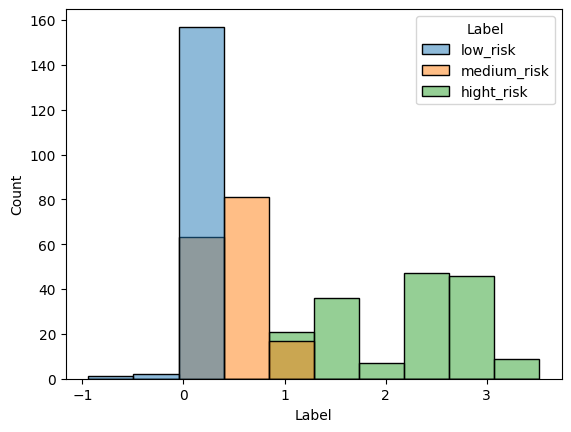

In [82]:
hue = pd.cut(final['Label'],bins=interval,labels=labels)
sns.histplot(x=final['Label'], hue=hue, bins=10)

In [83]:
final['label'] = hue

### RFE

In [84]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

final =final.dropna()
# Carregando um dataset de exemplo
X = final.drop(columns=['label'])
y = final['label']

# Definindo o modelo base (pode ser qualquer estimador com coef_ ou feature_importances_)
modelo = LogisticRegression(max_iter=200)

# Criando o RFE - selecionando 2 features
rfe = RFE(estimator=modelo, n_features_to_select=15)

# Fitando o RFE nos dados
rfe.fit(X, y)

# Verificando as features selecionadas
print("Features selecionadas:", rfe.support_)
print("Ranking das features:", rfe.ranking_)


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Features selecionadas: [False False False False False False False False False False False False
 False False False False  True False  True False False False False False
 False False  True False False False False  True False  True  True False
 False False False False False False False False False False False False
 False False False False False False False  True False False  True False
  True False False False False False False False False False False False
 False False False False False False  True False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False Fal

/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

In [85]:
dict_rfe = {}
for i in range(len(rfe.support_)):
    dict_rfe[final.columns[i]] = int(rfe.ranking_[i])
dict_rfe

{'Número de cotistas': 69,
 'Pessoa física': 76,
 'Pessoa jurídica não financeira': 95,
 'Banco comercial': 100,
 'Corretora ou distribuidora': 102,
 'Outras pessoas jurídicas financeiras': 98,
 'Investidores não residentes': 104,
 'Entidade aberta de previdência complementar': 105,
 'Entidade fechada de previdência complementar': 108,
 'Regime próprio de previdência dos servidores públicos': 158,
 'Sociedade seguradora ou resseguradora': 160,
 'Sociedade de capitalização e de arrendamento mercantil': 159,
 'Fundos de investimento imobiliário': 99,
 'Outros fundos de investimento': 97,
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)': 161,
 'Outros tipos de cotistas não relacionados': 78,
 'Ativo – R$': 1,
 'Patrimônio Líquido – R$': 3,
 'Número de Cotas Emitidas': 1,
 'Valor Patrimonial das Cotas – R$': 96,
 'Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)': 109,
 'Despesas com o agente custodiante em relação ao patrimônio líquid

In [86]:
X = X.loc[:,rfe.support_]

In [87]:
X

Ativo – R$  Número de Cotas Emitidas  \
0    2.110127e+08                24037284.0   
1    2.115427e+08                24037284.0   
2    2.114111e+08                24037284.0   
3    2.115093e+08                24037284.0   
4    2.296879e+08                24037284.0   
..            ...                       ...   
927  3.054425e+08                 3000000.0   
931  1.523035e+08                 1500000.0   
933  1.522499e+08                 1500000.0   
935  1.519632e+08                 1500000.0   
936  1.507432e+08                 1500000.0   

     Total mantido para as Necessidades de Liquidez (art. 46, § único, ICVM 472/08)  \
0                                           2676507.92                                
1                                           1061445.26                                
2                                          12577703.45                                
3                                           3542933.91                                
4                                           5774649.09                                
..                                                 ...                                
927                                         4718370.95                                
931                                         2582862.94                                
933                                         2648039.14                                
935                                         2672864.75                                
936                                         1682851.79                                

     Total investido     Terrenos  Imóveis para Renda Acabados  \
0       2.062183e+08         0.00                          0.0   
1       2.083603e+08         0.00                          0.0   
2       1.967102e+08         0.00                          0.0   
3       2.058398e+08         0.00                          0.0   
4       2.217847e+08         0.00                          0.0   
..               ...          ...                          ...   
927     3.004466e+08  24584955.90                          0.0   
931     1.497159e+08  24457508.84                          0.0   
933     1.495961e+08  14236285.54                          0.0   
935     1.491229e+08  24457508.84                          0.0   
936     1.488922e+08  24241508.84                          0.0   

     Letras de Crédito Imobiliário "LCI" (se FIAGRO, Letras de Crédito do Agronegócio "LCA")  \
0                                                  0.0                                         
1                                                  0.0                                         
2                                                  0.0                                         
3                                                  0.0                                         
4                                                  0.0                                         
..                                                 ...                                         
927                                                0.0                                         
931                                                0.0                                         
933                                                0.0                                         
935                                                0.0                                         
936                                                0.0                                         

     Valores a Receber  Contas a Receber por Venda de Imóveis  \
0           2117865.49                                    0.0   
1           2120925.39                                    0.0   
2           2123171.97                                    0.0   
3           2126523.28                                    0.0   
4           2128478.44                                    0.0   
..                 ...                                    ...

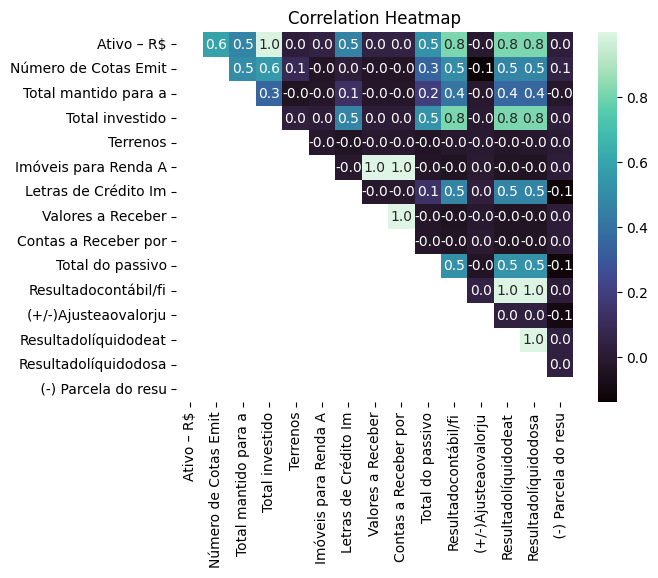

In [88]:
def create_heatmap(corr):
    mask = np.tril(np.ones_like(corr, dtype=bool))
    xticklabels = [col[:20] for col in corr.columns]
    yticklabels = [col[:20] for col in corr.columns]
    sns.heatmap(corr, annot=True, fmt='.1f', cmap='mako', square=False,
                xticklabels=xticklabels, yticklabels=yticklabels, mask=mask)
    plt.title('Correlation Heatmap')
    plt.show()
create_heatmap(X.corr())

In [89]:
y

0         low_risk
1         low_risk
2         low_risk
3      medium_risk
4         low_risk
          ...     
927    medium_risk
931    medium_risk
933    medium_risk
935    medium_risk
936    medium_risk
Name: label, Length: 487, dtype: category
Categories (3, object): ['low_risk' < 'medium_risk' < 'hight_risk']

/tmp/ipykernel_10721/2608090509.py:3: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


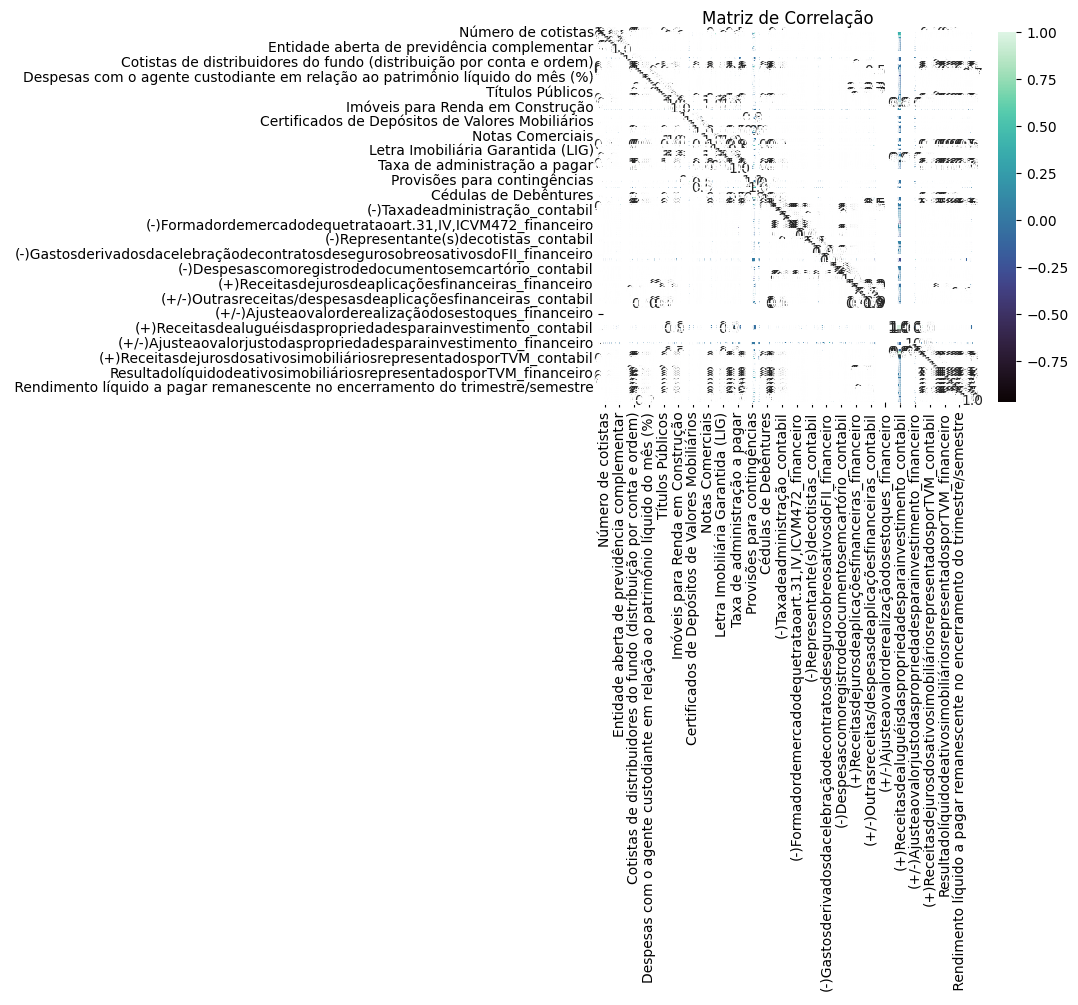

In [90]:
sns.heatmap(corr, annot=True, fmt=".1f", cmap="mako",square=True,)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

In [91]:
dict(sorted(dict_rfe.items(), key=lambda item: item[1]))

{'Ativo – R$': 1,
 'Número de Cotas Emitidas': 1,
 'Total mantido para as Necessidades de Liquidez (art. 46, § único, ICVM 472/08)': 1,
 'Total investido': 1,
 'Terrenos': 1,
 'Imóveis para Renda Acabados': 1,
 'Letras de Crédito Imobiliário "LCI" (se FIAGRO, Letras de Crédito do Agronegócio "LCA")': 1,
 'Valores a Receber': 1,
 'Contas a Receber por Venda de Imóveis': 1,
 'Total do passivo': 1,
 'Resultadocontábil/financeirotrimestrallíquido_financeiro': 1,
 '(+/-)AjusteaovalorjustodosativosimobiliáriosrepresentadosporTVM_financeiro': 1,
 'ResultadolíquidodeativosimobiliáriosrepresentadosporTVM_financeiro': 1,
 'Resultadolíquidodosativosimobiliários_financeiro': 1,
 ' (-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º)': 1,
 'Direitos reais sobre bens imóveis': 2,
 'Patrimônio Líquido – R$': 3,
 'Resultadocontábil/financeirotrimestrallíquido_contabil': 4,
 'Fundo de Investimento em Direitos Creditórios (FIDC)': 5,
 'Títulos Públicos': 6

### Discretizar os Dados

In [92]:
discretized = pd.DataFrame()
for colum in final.columns:
    qt_cuts = 5
    for i in range(qt_cuts,1,-1):
        try:
            if colum.lower() != 'label':
                print(colum)
                discretized[colum] = pd.qcut(final[colum],q=i, duplicates='drop')
                print(f"Coluna {colum} com {i} cortes")
                break
        except ValueError:
            pass 
discretized['Label'] = y
discretized

Número de cotistas
Coluna Número de cotistas com 5 cortes
Pessoa física
Coluna Pessoa física com 5 cortes
Pessoa jurídica não financeira
Coluna Pessoa jurídica não financeira com 5 cortes
Banco comercial
Coluna Banco comercial com 5 cortes
Corretora ou distribuidora
Coluna Corretora ou distribuidora com 5 cortes
Outras pessoas jurídicas financeiras
Coluna Outras pessoas jurídicas financeiras com 5 cortes
Investidores não residentes
Coluna Investidores não residentes com 5 cortes
Entidade aberta de previdência complementar
Coluna Entidade aberta de previdência complementar com 5 cortes
Entidade fechada de previdência complementar
Coluna Entidade fechada de previdência complementar com 5 cortes
Regime próprio de previdência dos servidores públicos
Coluna Regime próprio de previdência dos servidores públicos com 5 cortes
Sociedade seguradora ou resseguradora
Coluna Sociedade seguradora ou resseguradora com 5 cortes
Sociedade de capitalização e de arrendamento mercantil
Coluna Sociedade de

Número de cotistas        Pessoa física Pessoa jurídica não financeira  \
0    (28209.4, 106042.0]     (1293.6, 5248.6]                (350.0, 1750.0]   
1    (28209.4, 106042.0]     (-0.001, 1293.6]                 (-0.001, 10.0]   
2       (2048.8, 5767.0]     (-0.001, 1293.6]                 (-0.001, 10.0]   
3     (11436.2, 28209.4]  (12645.0, 108945.0]                (350.0, 1750.0]   
4    (28209.4, 106042.0]     (-0.001, 1293.6]                 (-0.001, 10.0]   
..                   ...                  ...                            ...   
927  (28209.4, 106042.0]  (12645.0, 108945.0]                (350.0, 1750.0]   
931   (11436.2, 28209.4]  (12645.0, 108945.0]                (350.0, 1750.0]   
933   (11436.2, 28209.4]  (12645.0, 108945.0]                  (90.0, 350.0]   
935   (11436.2, 28209.4]  (12645.0, 108945.0]                  (90.0, 350.0]   
936    (5767.0, 11436.2]    (5248.6, 12645.0]                  (90.0, 350.0]   

    Banco comercial Corretora ou distribuidora  \
0    (-0.001, 20.0]             (-0.001, 20.0]   
1    (-0.001, 20.0]             (-0.001, 20.0]   
2    (-0.001, 20.0]             (-0.001, 20.0]   
3    (-0.001, 20.0]             (-0.001, 20.0]   
4    (-0.001, 20.0]             (-0.001, 20.0]   
..              ...                        ...   
927  (-0.001, 20.0]             (-0.001, 20.0]   
931  (-0.001, 20.0]             (-0.001, 20.0]   
933  (-0.001, 20.0]             (-0.001, 20.0]   
935  (-0.001, 20.0]             (-0.001, 20.0]   
936  (-0.001, 20.0]             (-0.001, 20.0]   

    Outras pessoas jurídicas financeiras Investidores não residentes  \
0                        (-0.001, 570.0]                (10.0, 70.0]   
1                        (-0.001, 570.0]              (-0.001, 10.0]   
2                        (-0.001, 570.0]              (-0.001, 10.0]   
3                        (-0.001, 570.0]                (10.0, 70.0]   
4                        (-0.001, 570.0]              (-0.001, 10.0]   
..                                   ...                         ...   
927                      (-0.001, 570.0]              (-0.001, 10.0]   
931                      (-0.001, 570.0]              (-0.001, 10.0]   
933                      (-0.001, 570.0]              (-0.001, 10.0]   
935                      (-0.001, 570.0]              (-0.001, 10.0]   
936                      (-0.001, 570.0]              (-0.001, 10.0]   

    Entidade aberta de previdência complementar  \
0                                (-0.001, 10.0]   
1                                (-0.001, 10.0]   
2                                (-0.001, 10.0]   
3                                (-0.001, 10.0]   
4                                (-0.001, 10.0]   
..                                          ...   
927                              (-0.001, 10.0]   
931                              (-0.001, 10.0]   
933                              (-0.001, 10.0]   
935                              (-0.001, 10.0]   
936                              (-0.001, 10.0]   

    Entidade fechada de previdência complementar  \
0                                 (-0.001, 50.0]   
1                                 (-0.001, 50.0]   
2                                 (-0.001, 50.0]   
3                                 (-0.001, 50.0]   
4                                 (-0.001, 50.0]   
..                                           ...   
927                               (-0.001, 50.0]   
931                               (-0.001, 50.0]   
933                               (-0.001, 50.0]   
935                               (-0.001, 50.0]   
936                               (-0.001, 50.0]   

    Regime próprio de previdência dos servidores públicos  ...  \
0                                                  NaN     ...   
1                                                  NaN     ...   
2                                                  NaN     ...   
3                                                  NaN     ...   
4          

In [93]:
final['Label'].unique()

array([ 9.94270875e-02,  7.80159755e-02,  1.22811076e-01,  2.25688773e-01,
        8.13894096e-02,  5.91882866e-02,  6.36654941e-02,  6.34012061e-02,
        7.22342590e-02,  8.05507130e-02,  6.19860014e-02,  6.43734755e-02,
        6.35546382e-02,  6.24208851e-02,  7.11636585e-02,  6.55468020e-02,
        6.43578238e-02,  6.90352223e-02,  6.50652401e-02,  8.56019875e-02,
        8.74497562e-02,  8.02511493e-02,  2.74601263e+00,  2.42315369e+00,
        2.68210309e+00,  2.28655646e+00,  2.31024726e+00,  2.31956828e+00,
        2.35822286e+00,  2.34646549e+00,  2.44015727e+00,  2.34549683e+00,
        2.56466347e+00,  2.31303878e+00,  2.36643856e+00,  2.43277027e+00,
        2.64825081e+00,  2.99860291e+00,  2.32897641e+00,  2.26311236e+00,
        2.27995951e+00,  2.29975006e+00,  3.07545862e+00,  2.29844740e+00,
        2.25711165e+00,  2.42255904e+00,  2.37978080e+00,  2.51260865e+00,
        2.30510832e+00,  2.40216506e+00,  2.54147879e+00,  3.24527106e+00,
        3.28501014e+00,  

In [94]:
from sklearn.preprocessing import MinMaxScaler

normalized = pd.DataFrame()
scaler = MinMaxScaler()

for col in final.columns:
    if col.lower() != 'label':
        normalized[col] = scaler.fit_transform(final[[col]]).flatten()
normalized['Label'] = discretized['Label']
        
normalized

/tmp/ipykernel_10721/2397308516.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
/tmp/ipykernel_10721/2397308516.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
/tmp/ipykernel_10721/2397308516.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

Número de cotistas  Pessoa física  Pessoa jurídica não financeira  \
0              0.284122       0.027610                        0.262857   
1              0.280519       0.000000                        0.000000   
2              0.027661       0.000000                        0.000000   
3              0.263543       0.256083                        0.274286   
4              0.266080       0.000000                        0.000000   
..                  ...            ...                             ...   
482            0.329448       0.320363                        0.222857   
483            0.242031       0.235275                        0.222857   
484            0.218679       0.212594                        0.194286   
485            0.141570       0.137629                        0.142857   
486            0.066527       0.064675                        0.091429   

     Banco comercial  Corretora ou distribuidora  \
0                0.0                         0.0   
1                0.0                         0.0   
2                0.0                         0.0   
3                0.0                         0.0   
4                0.0                         0.0   
..               ...                         ...   
482              0.0                         0.0   
483              0.0                         0.0   
484              0.0                         0.0   
485              0.0                         0.0   
486              0.0                         0.0   

     Outras pessoas jurídicas financeiras  Investidores não residentes  \
0                                0.070175                     0.714286   
1                                0.000000                     0.000000   
2                                0.000000                     0.000000   
3                                0.000000                     0.857143   
4                                0.000000                     0.000000   
..                                    ...                          ...   
482                              0.000000                     0.000000   
483                              0.000000                     0.000000   
484                              0.000000                     0.000000   
485                              0.000000                     0.000000   
486                              0.000000                     0.000000   

     Entidade aberta de previdência complementar  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
..                                           ...   
482                                          0.0   
483                                          0.0   
484                                          0.0   
485                                          0.0   
486                                          0.0   

     Entidade fechada de previdência complementar  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
..                                            ...   
482                                           0.0   
483                                           0.0   
484                                           0.0   
485                                           0.0   
486                                           0.0   

     Regime próprio de previdência dos servidores públicos  ...  \
0                                                  0.0      ...   
1                                                  0.0      ...   
2                                                  0.0      ...   
3                                                  0.0      ...   
4    

# SVM

Separar treinamento teste

In [95]:
from sklearn.model_selection import train_test_split
normalized = normalized.dropna()
# Separação: 70% treino, 30% teste (pode ajustar o test_size se quiser)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_train

Ativo – R$  Número de Cotas Emitidas  \
304  3.321781e+08                34097599.0   
911  5.097982e+08                50000000.0   
933  1.522499e+08                 1500000.0   
878  2.929675e+08                30344090.0   
203  6.588488e+07                 6758424.0   
..            ...                       ...   
106  3.912294e+08                41380060.0   
555  8.255014e+07                  848097.0   
742  4.122373e+07                 4165891.0   
809  9.973599e+08                97599509.0   
508  2.344865e+07                 2786427.0   

     Total mantido para as Necessidades de Liquidez (art. 46, § único, ICVM 472/08)  \
304                                         9994157.59                                
911                                        18278538.65                                
933                                         2648039.14                                
878                                         7276819.31                                
203                                         1378505.38                                
..                                                 ...                                
106                                        19708305.31                                
555                                         2593590.47                                
742                                         4494801.99                                
809                                        73501122.18                                
508                                         3824693.76                                

     Total investido     Terrenos  Imóveis para Renda Acabados  \
304     3.221836e+08         0.00                          0.0   
911     4.911294e+08  23076806.10                          0.0   
933     1.495961e+08  14236285.54                          0.0   
878     2.856900e+08         0.00                          0.0   
203     6.450275e+07         0.00                          0.0   
..               ...          ...                          ...   
106     3.714939e+08         0.00                          0.0   
555     7.994598e+07         0.00                          0.0   
742     3.672761e+07         0.00                          0.0   
809     9.238207e+08         0.00                          0.0   
508     1.509834e+07         0.00                          0.0   

     Letras de Crédito Imobiliário "LCI" (se FIAGRO, Letras de Crédito do Agronegócio "LCA")  \
304                                          248867.36                                         
911                                               0.00                                         
933                                               0.00                                         
878                                               0.00                                         
203                                               0.00                                         
..                                                 ...                                         
106                                               0.00                                         
555                                               0.00                                         
742                                               0.00                                         
809                                               0.00                                         
508                                               0.00                                         

     Valores a Receber  Contas a Receber por Venda de Imóveis  \
304             342.71                                    0.0   
911          390312.19                                    0.0   
933            5744.69                                    0.0   
878             635.91                                    0.0   
203            3626.09                                    0.0   
..                 ...                                    ...

In [135]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def create_auc(model, y_test, X_test, model_name, classes=['Alto Risco', 'Baixo Risco', 'Médio Risco'], save_path='figuras/'):
    """
    Gera e salva a curva ROC para um modelo de classificação multiclasse.
    
    Parâmetros:
    - model: Modelo treinado (ex.: SVM, Random Forest, RNA).
    - y_test: Rótulos verdadeiros do conjunto de teste.
    - X_test: Dados de teste.
    - model_name: Nome do modelo para o arquivo (ex.: 'svm_c1_rbf').
    - classes: Lista com os nomes das classes (padrão: ['Alto Risco', 'Baixo Risco', 'Médio Risco']).
    - save_path: Diretório para salvar o PDF (padrão: 'figuras/').
    
    Retorna:
    - Exibe o gráfico e salva como PDF.
    """
    # Verificar se y_test contém as classes esperadas
    unique_classes = np.unique(y_test)
    if len(unique_classes) != len(classes):
        raise ValueError(f"Classes em y_test {unique_classes} não correspondem às esperadas {classes}")
    
    # Binarizar y_test
    try:
        y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    except ValueError:
        # Se y_test contém strings, mapear para inteiros
        class_mapping = {name: idx for idx, name in enumerate(classes)}
        y_test_numeric = [class_mapping.get(label, -1) for label in y_test]
        if -1 in y_test_numeric:
            raise ValueError("y_test contém classes não reconhecidas")
        y_test_bin = label_binarize(y_test_numeric, classes=[0, 1, 2])

    # Obter scores do modelo
    if hasattr(model, 'decision_function'):
        y_score = model.decision_function(X_test)
    elif hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(X_test)
    else:
        raise ValueError("Modelo não suporta decision_function ou predict_proba")

    # Calcular ROC e AUC para cada classe
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotar as curvas ROC
    plt.figure(figsize=(8, 6))
    for i, classe in enumerate(classes):
        plt.plot(fpr[i], tpr[i], label=f'{classe} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('')
    plt.legend(loc='lower right')
    plt.grid(True)

    # Salvar como PDF
    import os
    os.makedirs(save_path, exist_ok=True)
    pdf_file = f'{save_path}roc_{model_name}.pdf'
    plt.savefig(pdf_file, format='pdf', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    return roc_auc

SVM: C:0.5, kernel: poly


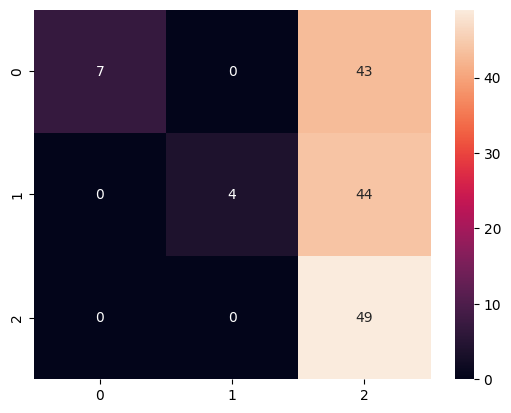

              precision    recall  f1-score   support

  hight_risk       1.00      0.14      0.25        50
    low_risk       1.00      0.08      0.15        48
 medium_risk       0.36      1.00      0.53        49

    accuracy                           0.41       147
   macro avg       0.79      0.41      0.31       147
weighted avg       0.79      0.41      0.31       147



/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


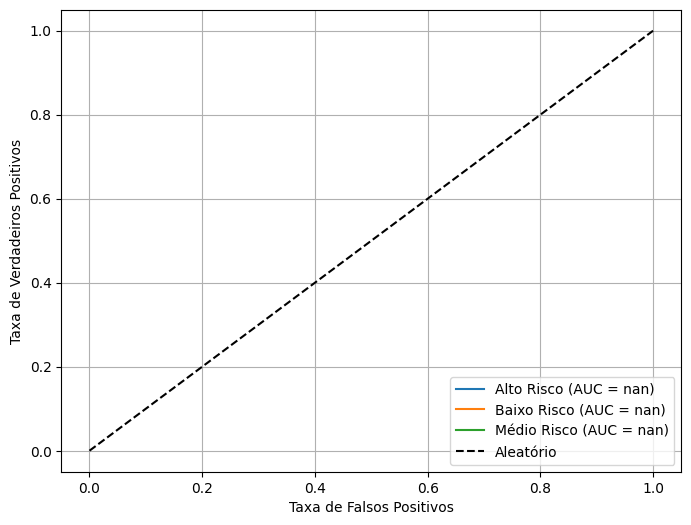

------------------------------------------------------
SVM: C:0.5, kernel: rbf


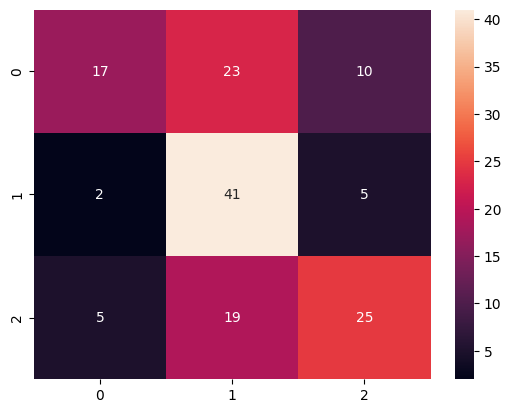

              precision    recall  f1-score   support

  hight_risk       0.71      0.34      0.46        50
    low_risk       0.49      0.85      0.63        48
 medium_risk       0.62      0.51      0.56        49

    accuracy                           0.56       147
   macro avg       0.61      0.57      0.55       147
weighted avg       0.61      0.56      0.55       147



/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


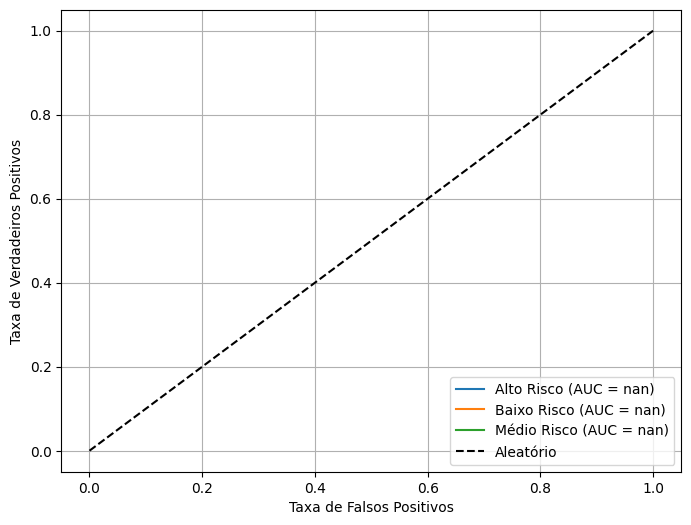

------------------------------------------------------
SVM: C:1, kernel: poly


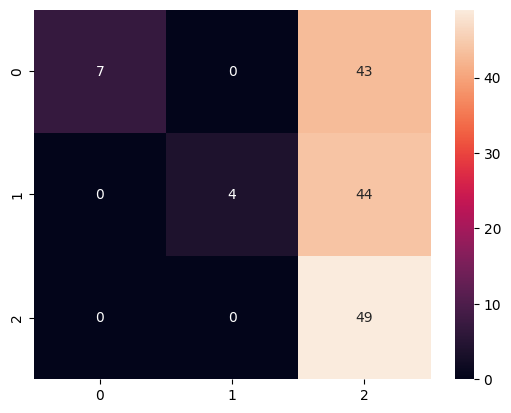

              precision    recall  f1-score   support

  hight_risk       1.00      0.14      0.25        50
    low_risk       1.00      0.08      0.15        48
 medium_risk       0.36      1.00      0.53        49

    accuracy                           0.41       147
   macro avg       0.79      0.41      0.31       147
weighted avg       0.79      0.41      0.31       147



/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


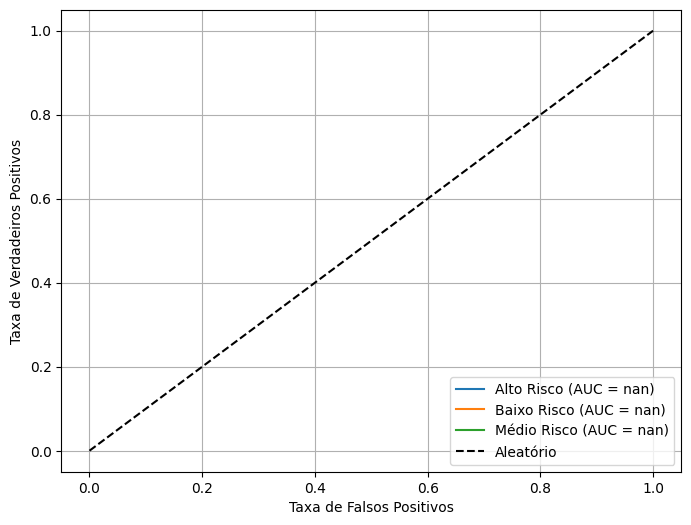

------------------------------------------------------
SVM: C:1, kernel: rbf


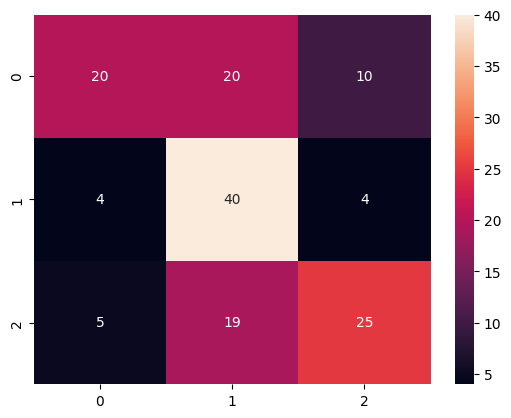

              precision    recall  f1-score   support

  hight_risk       0.69      0.40      0.51        50
    low_risk       0.51      0.83      0.63        48
 medium_risk       0.64      0.51      0.57        49

    accuracy                           0.58       147
   macro avg       0.61      0.58      0.57       147
weighted avg       0.61      0.58      0.57       147



/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


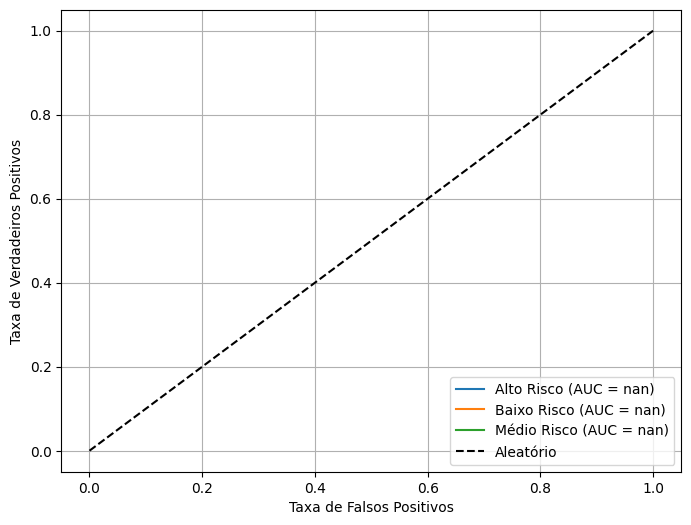

------------------------------------------------------
SVM: C:10, kernel: poly


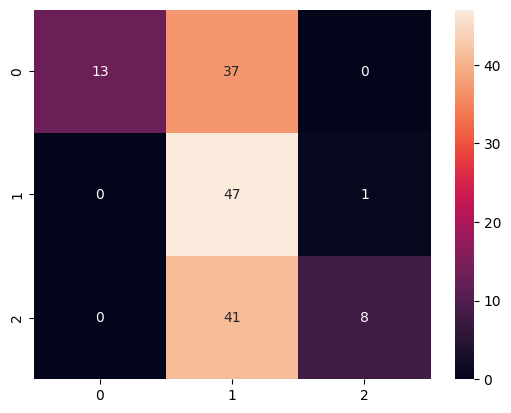

              precision    recall  f1-score   support

  hight_risk       1.00      0.26      0.41        50
    low_risk       0.38      0.98      0.54        48
 medium_risk       0.89      0.16      0.28        49

    accuracy                           0.46       147
   macro avg       0.75      0.47      0.41       147
weighted avg       0.76      0.46      0.41       147



/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


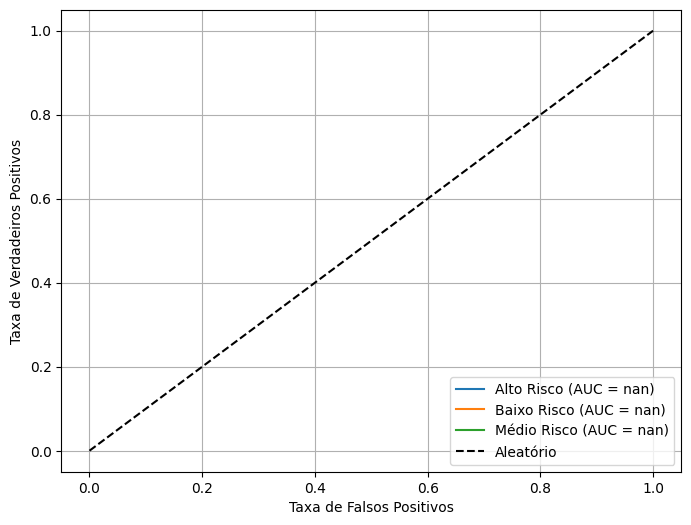

------------------------------------------------------
SVM: C:10, kernel: rbf


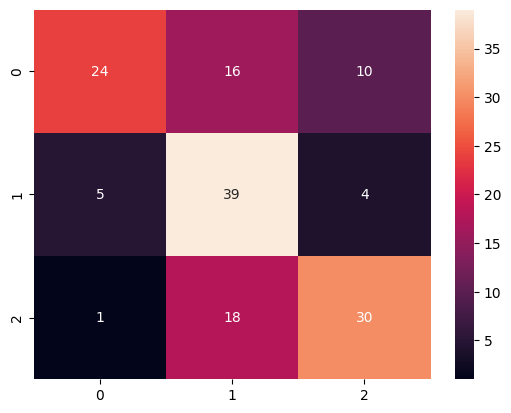

              precision    recall  f1-score   support

  hight_risk       0.80      0.48      0.60        50
    low_risk       0.53      0.81      0.64        48
 medium_risk       0.68      0.61      0.65        49

    accuracy                           0.63       147
   macro avg       0.67      0.63      0.63       147
weighted avg       0.67      0.63      0.63       147



/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


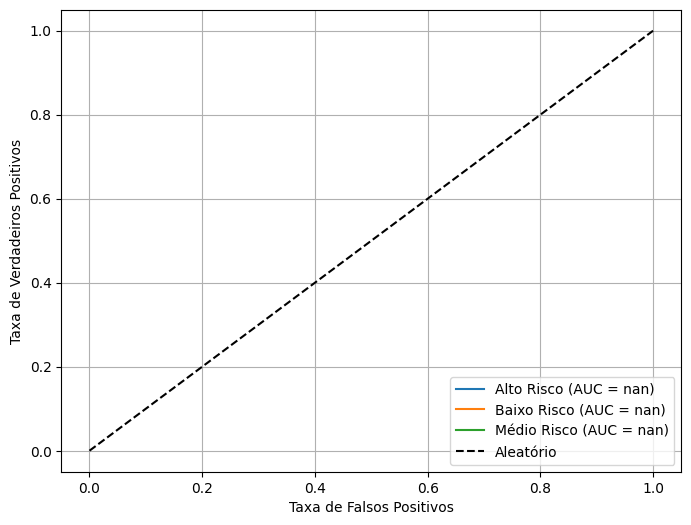

------------------------------------------------------


In [136]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
cs = [.5,1,10]
kernels = ['poly','rbf']
X_resampla,y_resample = smote.fit_resample(X_test,y_test)
# print(y_resample.groupby().count())

for c in cs:
    for kernel in kernels:
        svc = SVC(kernel=kernel,C=c,probability=True, decision_function_shape='ovo', random_state=0)
        svc.fit(X=X_resampla,y=y_resample)
        y_predict = svc.predict(X=X_test)
        title = f'SVM: C:{c}, kernel: {kernel}'
        print(title)
        sns.heatmap(confusion_matrix(y_true=y_test,y_pred=y_predict),annot=True,fmt='d')
        plt.show()
        # print(confusion_matrix(y_true=y_test,y_pred=y_predict))
        cr = classification_report(y_test, y_predict)
        print(cr)
        results[title] = y_predict
        create_auc(svc,y_predict,X_test,"svc")
        print('------------------------------------------------------')
        
        


Número de cotistas
Pessoa física
Pessoa jurídica não financeira
Banco comercial
Corretora ou distribuidora
Outras pessoas jurídicas financeiras
Investidores não residentes
Entidade aberta de previdência complementar
Entidade fechada de previdência complementar
Regime próprio de previdência dos servidores públicos
Sociedade seguradora ou resseguradora
Sociedade de capitalização e de arrendamento mercantil
Fundos de investimento imobiliário
Outros fundos de investimento
Cotistas de distribuidores do fundo (distribuição por conta e ordem)
Outros tipos de cotistas não relacionados
Ativo – R$
Patrimônio Líquido – R$
Número de Cotas Emitidas
Valor Patrimonial das Cotas – R$
Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)
Despesas com o agente custodiante em relação ao patrimônio líquido do mês (%)
Rentabilidade Efetiva Mensal (%)
Rentabilidade Patrimonial do Mês de Referência² (%)
Dividend Yield do Mês de Referência³ (%)
Amortizações de cotas do Mês de Referê

/tmp/ipykernel_10721/1603043034.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
/tmp/ipykernel_10721/1603043034.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
/tmp/ipykernel_10721/1603043034.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

Random Forest (n_estimators=10) - Matriz de Confusão:


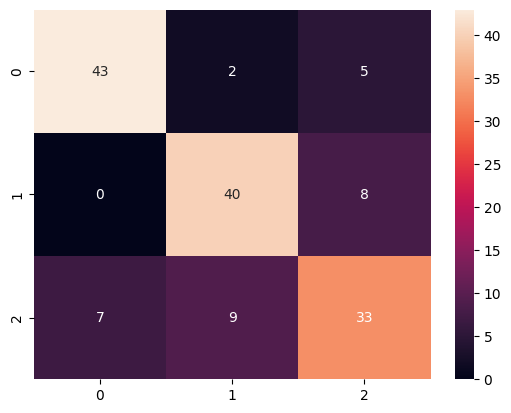


Random Forest - Acurácia:
0.7891156462585034

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.86      0.86      0.86        50
    low_risk       0.78      0.83      0.81        48
 medium_risk       0.72      0.67      0.69        49

    accuracy                           0.79       147
   macro avg       0.79      0.79      0.79       147
weighted avg       0.79      0.79      0.79       147

Random Forest (n_estimators=100) - Matriz de Confusão:


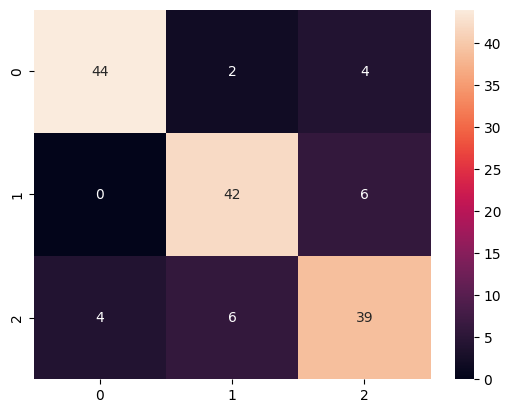


Random Forest - Acurácia:
0.8503401360544217

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.92      0.88      0.90        50
    low_risk       0.84      0.88      0.86        48
 medium_risk       0.80      0.80      0.80        49

    accuracy                           0.85       147
   macro avg       0.85      0.85      0.85       147
weighted avg       0.85      0.85      0.85       147

Random Forest (n_estimators=1000) - Matriz de Confusão:


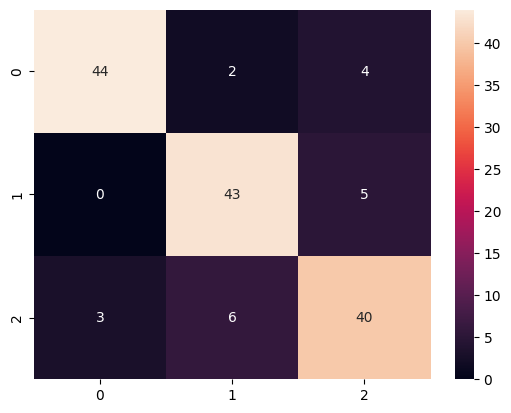


Random Forest - Acurácia:
0.8639455782312925

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.94      0.88      0.91        50
    low_risk       0.84      0.90      0.87        48
 medium_risk       0.82      0.82      0.82        49

    accuracy                           0.86       147
   macro avg       0.87      0.86      0.86       147
weighted avg       0.87      0.86      0.86       147

Random Forest - Matriz de Confusão:


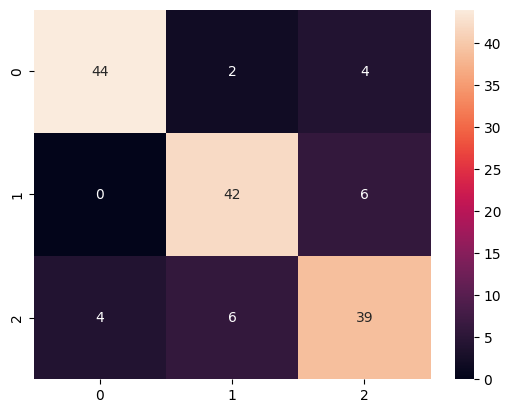


Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.92      0.88      0.90        50
    low_risk       0.84      0.88      0.86        48
 medium_risk       0.80      0.80      0.80        49

    accuracy                           0.85       147
   macro avg       0.85      0.85      0.85       147
weighted avg       0.85      0.85      0.85       147



In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Normalização dos dados
normalized = pd.DataFrame()
scaler = MinMaxScaler()

for col in final.columns:
    if col.lower() != 'label':
        print(col)
        normalized[col] = scaler.fit_transform(final[[col]]).flatten()
    else:
        normalized[col] = discretized['Label']  # mantém o Label

# Removendo NaN
normalized = normalized.dropna()

X = X

# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
n_estimators = (10, 100, 1000)
for n_estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=n_estimator, random_state=0)
    rf.fit(X_train, y_train)
    y_predict_rf = rf.predict(X_test)

    # Avaliação do modelo Random Forest
    title = f"Random Forest (n_estimators={n_estimator})"
    print(f"{title} - Matriz de Confusão:")
    sns.heatmap(confusion_matrix(y_test, y_predict_rf), annot=True, fmt='d')
    plt.show()

    print("\nRandom Forest - Acurácia:")
    print(accuracy_score(y_test, y_predict_rf))
    results[title] = y_predict_rf
    print("\nRandom Forest - Relatório de Classificação:")
    print(classification_report(y_test, y_predict_rf))
# Aplicando Random Forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)

# Avaliação do modelo Random Forest
print("Random Forest - Matriz de Confusão:")
sns.heatmap(confusion_matrix(y_test, y_predict_rf),annot=True)
plt.show()

print("\nRandom Forest - Relatório de Classificação:")
print(classification_report(y_test, y_predict_rf))


In [138]:
y_train.value_counts()

label
hight_risk     116
low_risk       112
medium_risk    112
Name: count, dtype: int64

Random Forest (n_estimators=10) - Matriz de Confusão:


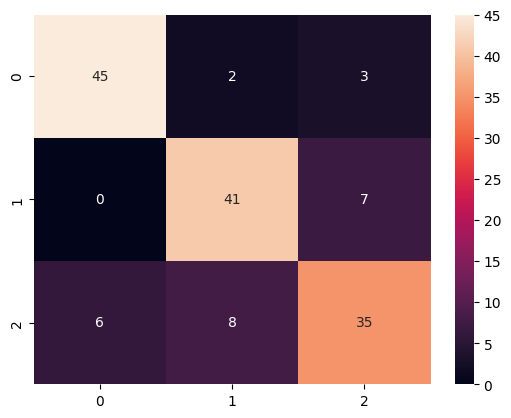


Random Forest - Acurácia:
0.8231292517006803

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.88      0.90      0.89        50
    low_risk       0.80      0.85      0.83        48
 medium_risk       0.78      0.71      0.74        49

    accuracy                           0.82       147
   macro avg       0.82      0.82      0.82       147
weighted avg       0.82      0.82      0.82       147

Random Forest (n_estimators=100) - Matriz de Confusão:


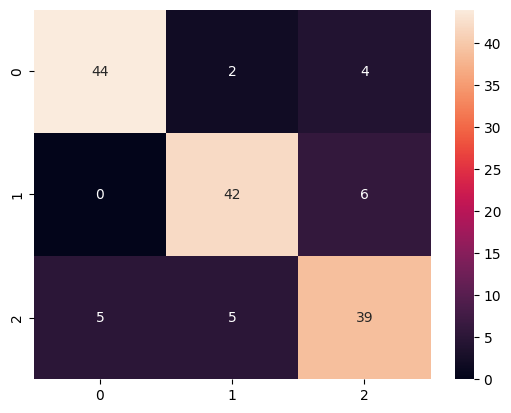


Random Forest - Acurácia:
0.8503401360544217

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.90      0.88      0.89        50
    low_risk       0.86      0.88      0.87        48
 medium_risk       0.80      0.80      0.80        49

    accuracy                           0.85       147
   macro avg       0.85      0.85      0.85       147
weighted avg       0.85      0.85      0.85       147

Random Forest (n_estimators=1000) - Matriz de Confusão:


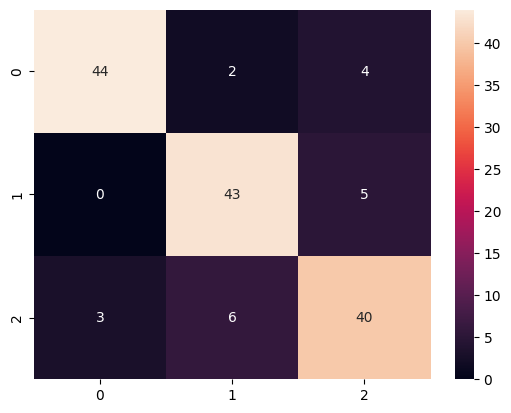


Random Forest - Acurácia:
0.8639455782312925

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.94      0.88      0.91        50
    low_risk       0.84      0.90      0.87        48
 medium_risk       0.82      0.82      0.82        49

    accuracy                           0.86       147
   macro avg       0.87      0.86      0.86       147
weighted avg       0.87      0.86      0.86       147



In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Rodar o Random Forest novamente
n_estimators = (10, 100, 1000)
for n_estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=n_estimator, random_state=0)
    rf.fit(X_resampled, y_resampled)
    y_predict_rf = rf.predict(X_test)

    # Avaliação do modelo Random Forest
    print(f"Random Forest (n_estimators={n_estimator}) - Matriz de Confusão:")
    sns.heatmap(confusion_matrix(y_test, y_predict_rf), annot=True, fmt='d')
    plt.show()
    print("\nRandom Forest - Acurácia:")
    print(accuracy_score(y_test, y_predict_rf))

    print("\nRandom Forest - Relatório de Classificação:")
    print(classification_report(y_test, y_predict_rf))

                                              Feature  Importance
1                            Número de Cotas Emitidas    0.256453
0                                          Ativo – R$    0.128649
3                                     Total investido    0.117942
9                                    Total do passivo    0.069886
2   Total mantido para as Necessidades de Liquidez...    0.067410
7                                   Valores a Receber    0.063787
11  (+/-)Ajusteaovalorjustodosativosimobiliáriosre...    0.062678
13   Resultadolíquidodosativosimobiliários_financeiro    0.058826
12  Resultadolíquidodeativosimobiliáriosrepresenta...    0.057768
10  Resultadocontábil/financeirotrimestrallíquido_...    0.055619


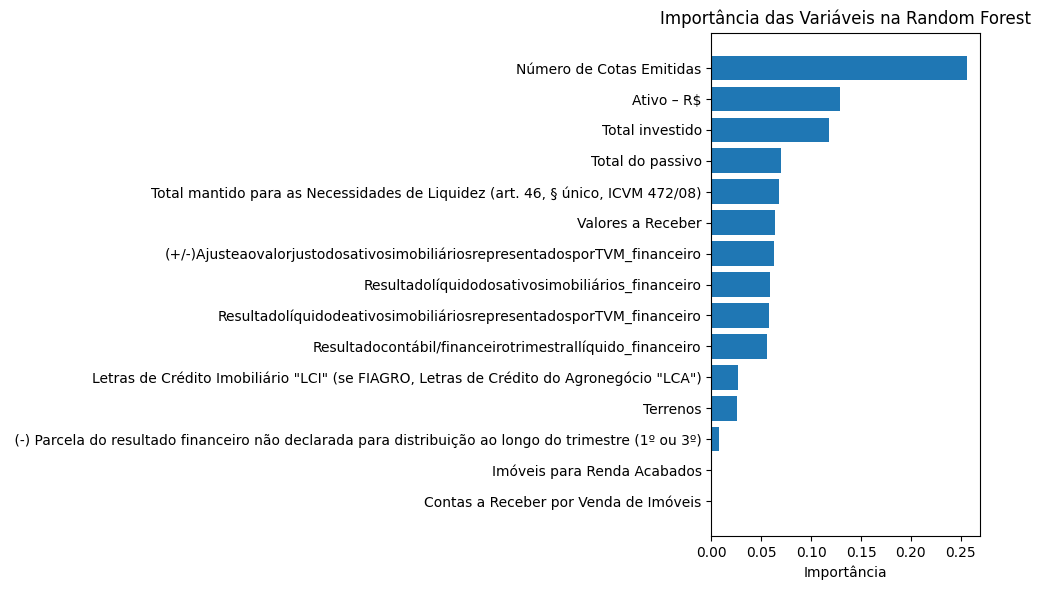

In [140]:
importances = rf.feature_importances_
feature_names = X_train.columns  # Nomes das colunas do dataset

# Criar um DataFrame para visualização
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Exibir as 10 variáveis mais importantes
print(feature_importance_df.head(10))

# Visualizar com um gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.title('Importância das Variáveis na Random Forest')
plt.gca().invert_yaxis()  # Inverter para as mais importantes aparecerem no topo
plt.tight_layout()
plt.show()

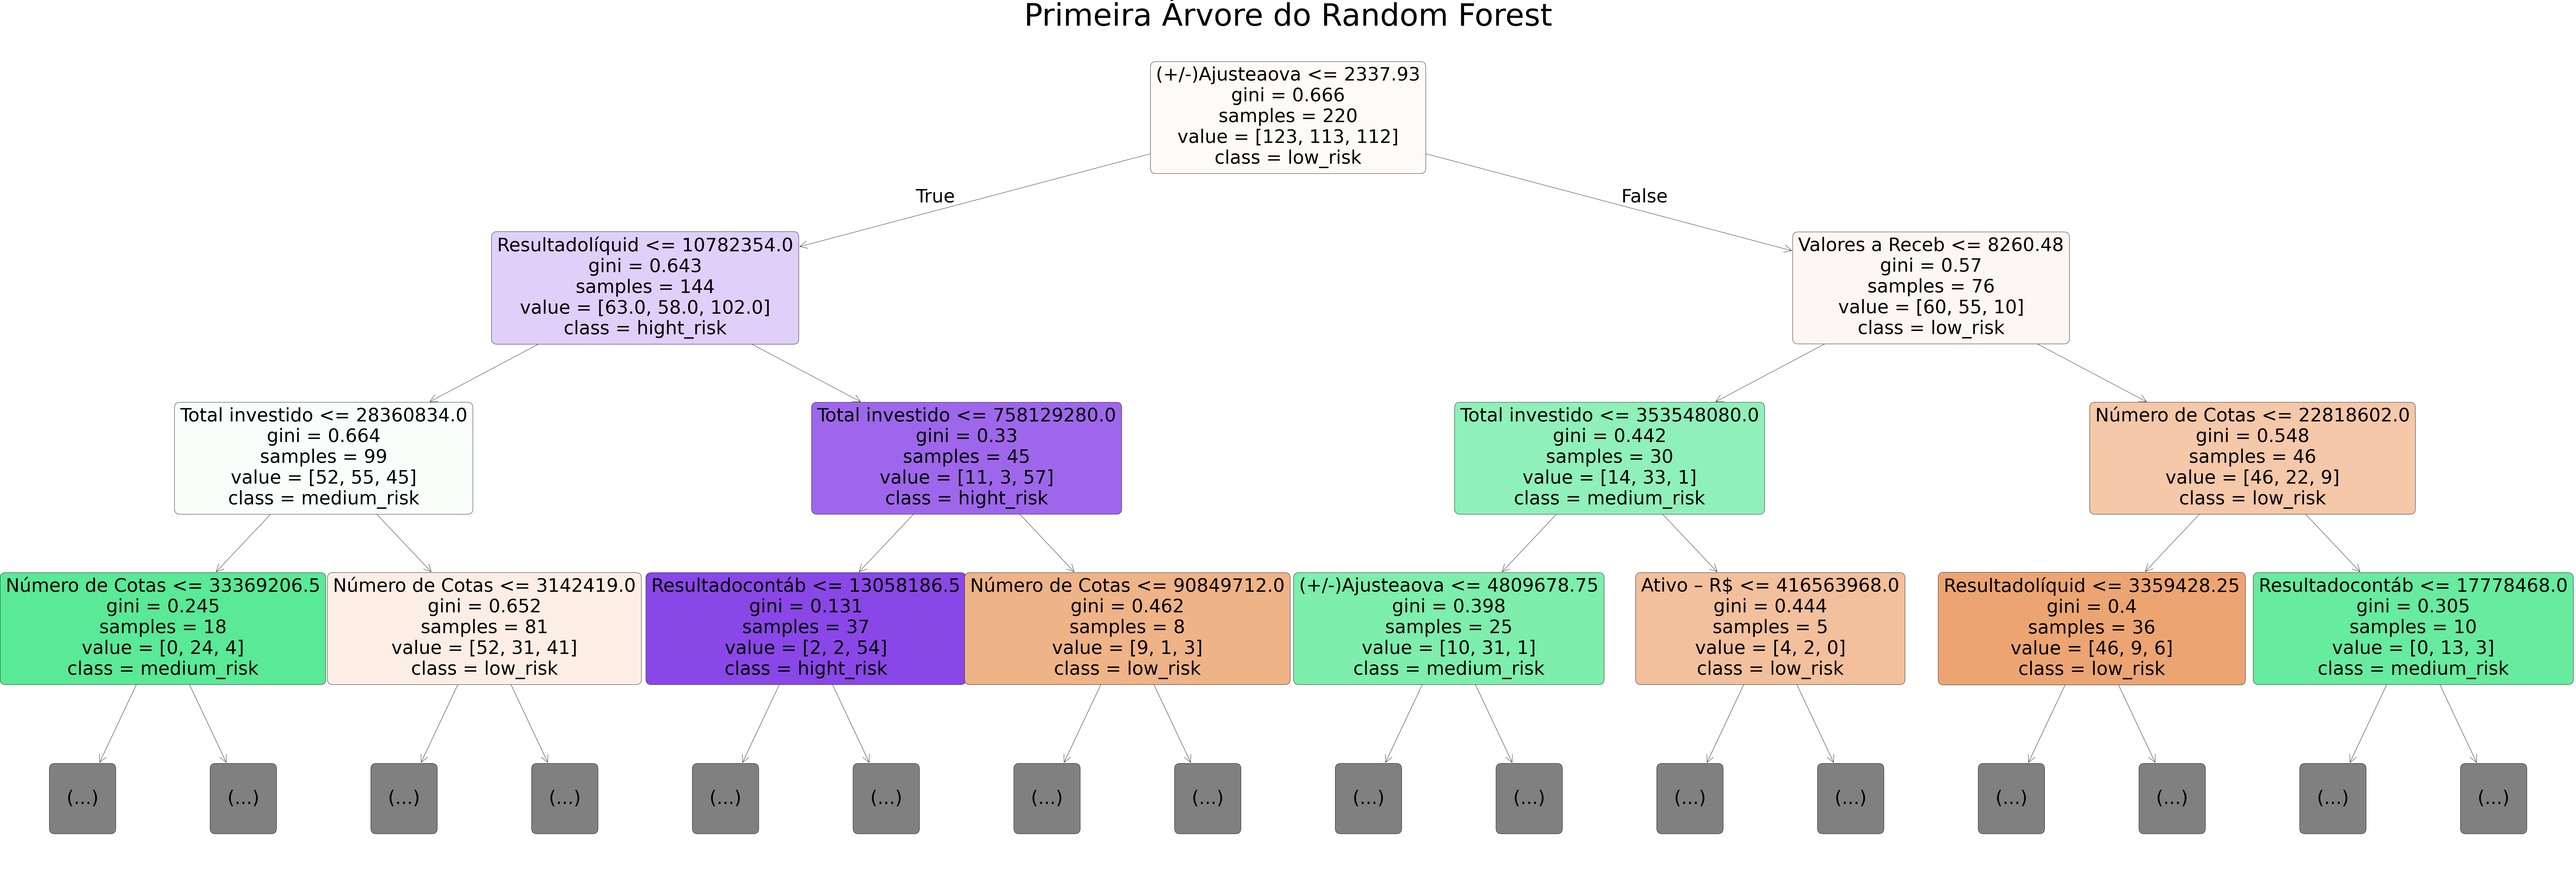

In [141]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

# Acessar a primeira árvore do Random Forest
first_tree = rf.estimators_[1]
# Criar nomes encurtados para as features
short_feature_names = [col[:15] for col in X.columns]  # até 10 caracteres

# Acessar a primeira árvore do Random Forest
first_tree = rf.estimators_[0]

# Plotar a árvore com nomes encurtados
plt.figure(figsize=(150, 50))
plot_tree(first_tree,
          feature_names=short_feature_names,
          class_names=y.cat.categories,
          filled=True,
          rounded=True,
          fontsize=60,
          max_depth=3)
plt.title("Primeira Árvore do Random Forest", fontsize=100)
plt.show()

# RNA

In [142]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# Modelo com duas camadas intermediárias utilizando ReLU.
model_relu = Sequential([
    Dense(64, input_dim=15),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(3),
    Activation('softmax')
])

model_relu.compile(optimizer=Adam(learning_rate=0.001), 
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

model_relu.summary()


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_168 (Dense)               │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_168 (Activation)     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_169 (Activation)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 3)              │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_170 (Activation)     │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,203 (12.51 KB)

 Trainable params: 3,203 (12.51 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
X_train.dtypes
# y_train.dtypes

Ativo – R$                                                                                               float64
Número de Cotas Emitidas                                                                                 float64
Total mantido para as Necessidades de Liquidez (art. 46, § único, ICVM 472/08)                           float64
Total investido                                                                                          float64
Terrenos                                                                                                 float64
Imóveis para Renda Acabados                                                                              float64
Letras de Crédito Imobiliário "LCI" (se FIAGRO, Letras de Crédito do Agronegócio "LCA")                  float64
Valores a Receber                                                                                        float64
Contas a Receber por Venda de Imóveis                                                           

In [144]:
# Convert categorical labels to one-hot encoding
y_train_encoded = tf.keras.utils.to_categorical(y_train.cat.codes, num_classes=3)
y_test_encoded = tf.keras.utils.to_categorical(y_test.cat.codes, num_classes=3)

# Train the model
model_relu.fit(X_train, y_train_encoded, epochs=10, batch_size=32)

# Avaliação do modelo
y_predict_relu = model_relu.predict(X_test)
y_predict_relu = tf.argmax(y_predict_relu, axis=1)
y_test_decoded = tf.argmax(y_test_encoded, axis=1)



Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3323 - loss: 17107848.0000
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4588 - loss: 8038826.5000  
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4804 - loss: 3978900.7500
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4310 - loss: 3387578.5000 
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4592 - loss: 2190560.7500
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5338 - loss: 1217186.1250 
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5828 - loss: 1460550.0000
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5715 - loss: 907769.0625 
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6167 - loss: 927028.5000  
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5708 - loss: 646050.5000 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Testing configuration: 1 layers, 16 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
MLP: 1 layers, 16 neurons/layer, relu activation
Confusion Matrix:


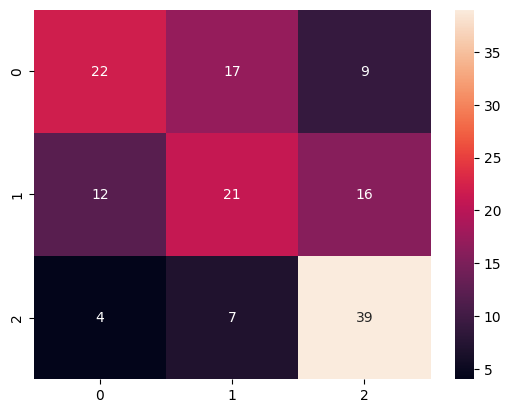

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.46      0.51        48
           1       0.47      0.43      0.45        49
           2       0.61      0.78      0.68        50

    accuracy                           0.56       147
   macro avg       0.55      0.56      0.55       147
weighted avg       0.55      0.56      0.55       147

------------------------------------------------------
Testing configuration: 1 layers, 16 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
MLP: 1 layers, 16 neurons/layer, tanh activation
Confusion Matrix:


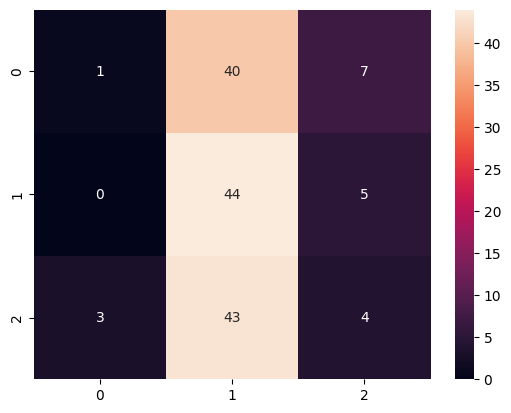

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.02      0.04        48
           1       0.35      0.90      0.50        49
           2       0.25      0.08      0.12        50

    accuracy                           0.33       147
   macro avg       0.28      0.33      0.22       147
weighted avg       0.28      0.33      0.22       147

------------------------------------------------------
Testing configuration: 1 layers, 16 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MLP: 1 layers, 16 neurons/layer, sigmoid activation
Confusion Matrix:


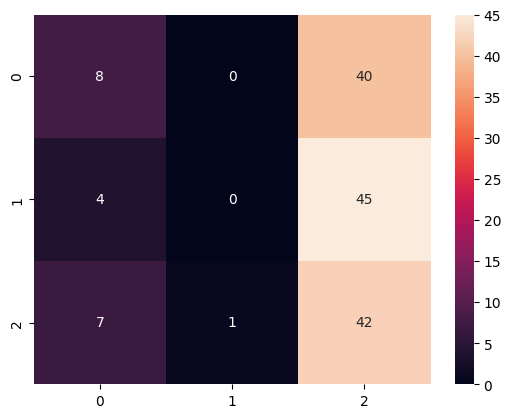

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.17      0.24        48
           1       0.00      0.00      0.00        49
           2       0.33      0.84      0.47        50

    accuracy                           0.34       147
   macro avg       0.25      0.34      0.24       147
weighted avg       0.25      0.34      0.24       147

------------------------------------------------------
Testing configuration: 1 layers, 32 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MLP: 1 layers, 32 neurons/layer, relu activation
Confusion Matrix:


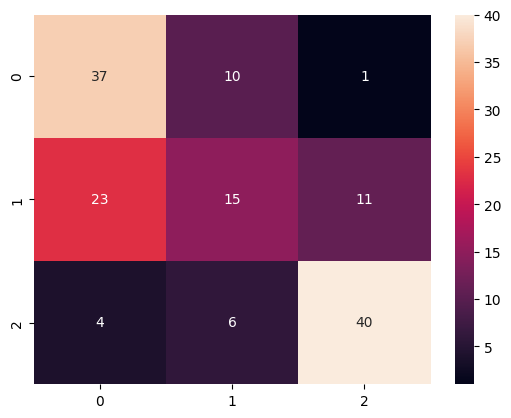

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.77      0.66        48
           1       0.48      0.31      0.38        49
           2       0.77      0.80      0.78        50

    accuracy                           0.63       147
   macro avg       0.61      0.63      0.61       147
weighted avg       0.61      0.63      0.61       147

------------------------------------------------------
Testing configuration: 1 layers, 32 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
MLP: 1 layers, 32 neurons/layer, tanh activation
Confusion Matrix:


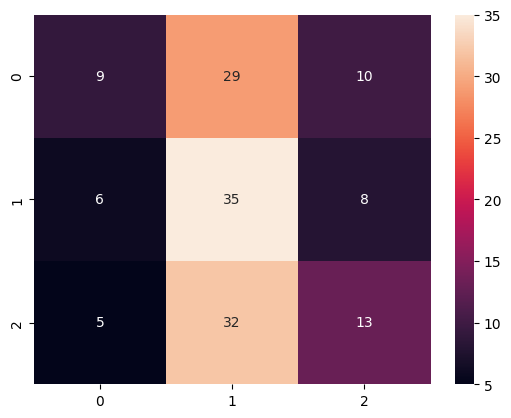

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.19      0.26        48
           1       0.36      0.71      0.48        49
           2       0.42      0.26      0.32        50

    accuracy                           0.39       147
   macro avg       0.41      0.39      0.36       147
weighted avg       0.41      0.39      0.36       147

------------------------------------------------------
Testing configuration: 1 layers, 32 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
MLP: 1 layers, 32 neurons/layer, sigmoid activation
Confusion Matrix:


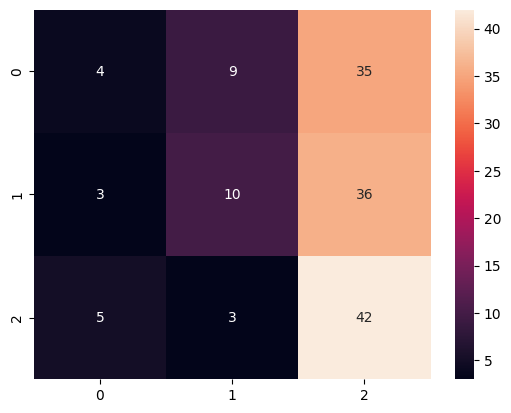

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.08      0.13        48
           1       0.45      0.20      0.28        49
           2       0.37      0.84      0.52        50

    accuracy                           0.38       147
   macro avg       0.39      0.38      0.31       147
weighted avg       0.39      0.38      0.31       147

------------------------------------------------------
Testing configuration: 1 layers, 64 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
MLP: 1 layers, 64 neurons/layer, relu activation
Confusion Matrix:


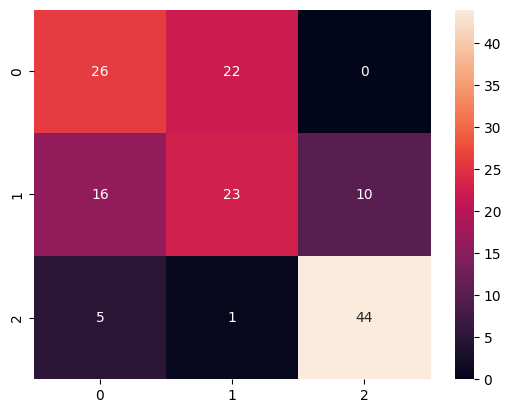

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.54      0.55        48
           1       0.50      0.47      0.48        49
           2       0.81      0.88      0.85        50

    accuracy                           0.63       147
   macro avg       0.62      0.63      0.63       147
weighted avg       0.62      0.63      0.63       147

------------------------------------------------------
Testing configuration: 1 layers, 64 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MLP: 1 layers, 64 neurons/layer, tanh activation
Confusion Matrix:


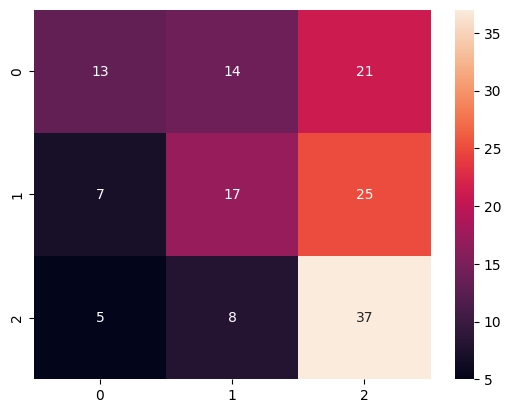

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.27      0.36        48
           1       0.44      0.35      0.39        49
           2       0.45      0.74      0.56        50

    accuracy                           0.46       147
   macro avg       0.47      0.45      0.43       147
weighted avg       0.47      0.46      0.43       147

------------------------------------------------------
Testing configuration: 1 layers, 64 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MLP: 1 layers, 64 neurons/layer, sigmoid activation
Confusion Matrix:


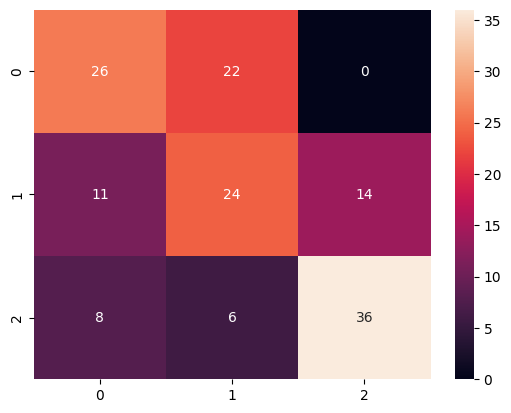

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.54      0.56        48
           1       0.46      0.49      0.48        49
           2       0.72      0.72      0.72        50

    accuracy                           0.59       147
   macro avg       0.59      0.58      0.58       147
weighted avg       0.59      0.59      0.59       147

------------------------------------------------------
Testing configuration: 2 layers, 16 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
MLP: 2 layers, 16 neurons/layer, relu activation
Confusion Matrix:


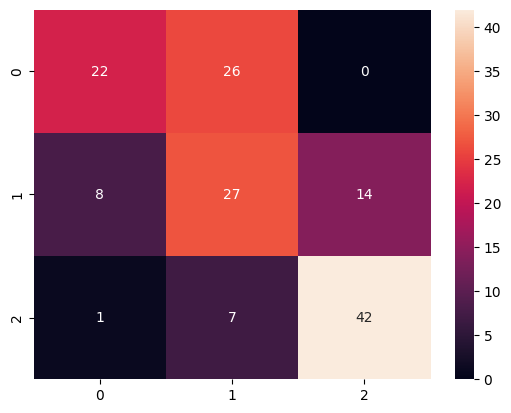

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.46      0.56        48
           1       0.45      0.55      0.50        49
           2       0.75      0.84      0.79        50

    accuracy                           0.62       147
   macro avg       0.64      0.62      0.61       147
weighted avg       0.64      0.62      0.62       147

------------------------------------------------------
Testing configuration: 2 layers, 16 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
MLP: 2 layers, 16 neurons/layer, tanh activation
Confusion Matrix:


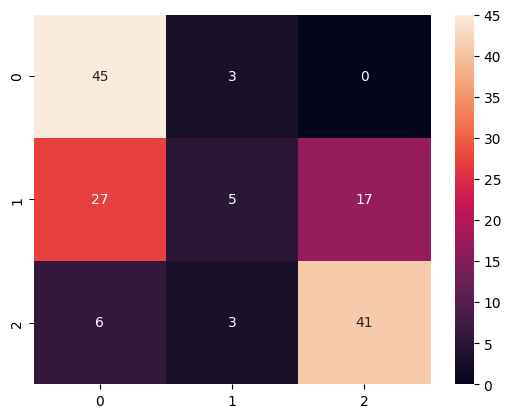

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.94      0.71        48
           1       0.45      0.10      0.17        49
           2       0.71      0.82      0.76        50

    accuracy                           0.62       147
   macro avg       0.58      0.62      0.55       147
weighted avg       0.58      0.62      0.55       147

------------------------------------------------------
Testing configuration: 2 layers, 16 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
MLP: 2 layers, 16 neurons/layer, sigmoid activation
Confusion Matrix:


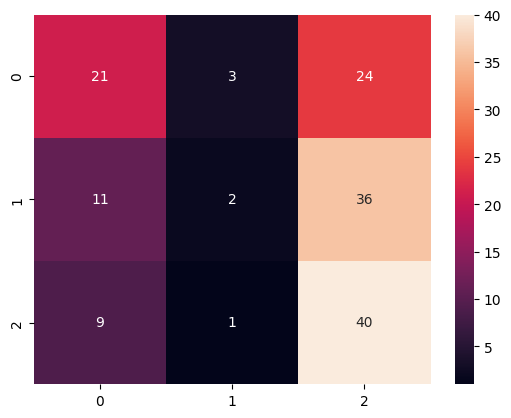

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.44      0.47        48
           1       0.33      0.04      0.07        49
           2       0.40      0.80      0.53        50

    accuracy                           0.43       147
   macro avg       0.42      0.43      0.36       147
weighted avg       0.41      0.43      0.36       147

------------------------------------------------------
Testing configuration: 2 layers, 32 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MLP: 2 layers, 32 neurons/layer, relu activation
Confusion Matrix:


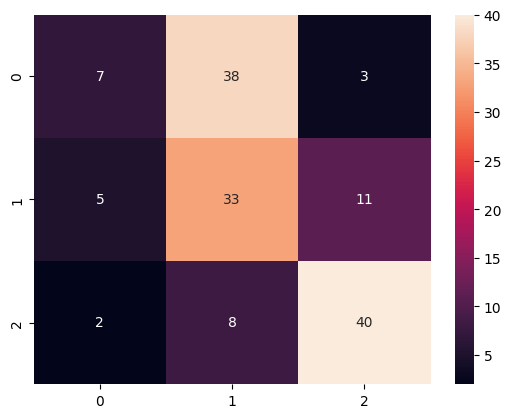

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.15      0.23        48
           1       0.42      0.67      0.52        49
           2       0.74      0.80      0.77        50

    accuracy                           0.54       147
   macro avg       0.55      0.54      0.50       147
weighted avg       0.55      0.54      0.51       147

------------------------------------------------------
Testing configuration: 2 layers, 32 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MLP: 2 layers, 32 neurons/layer, tanh activation
Confusion Matrix:


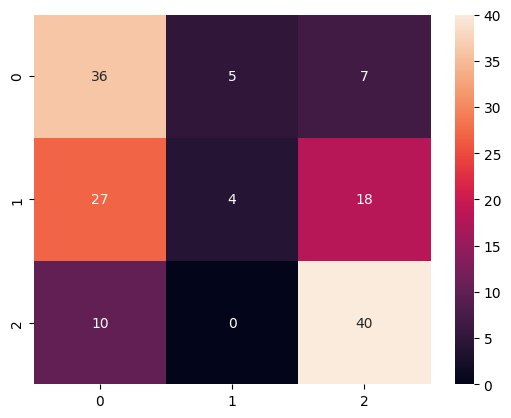

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.75      0.60        48
           1       0.44      0.08      0.14        49
           2       0.62      0.80      0.70        50

    accuracy                           0.54       147
   macro avg       0.52      0.54      0.48       147
weighted avg       0.52      0.54      0.48       147

------------------------------------------------------
Testing configuration: 2 layers, 32 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
MLP: 2 layers, 32 neurons/layer, sigmoid activation
Confusion Matrix:


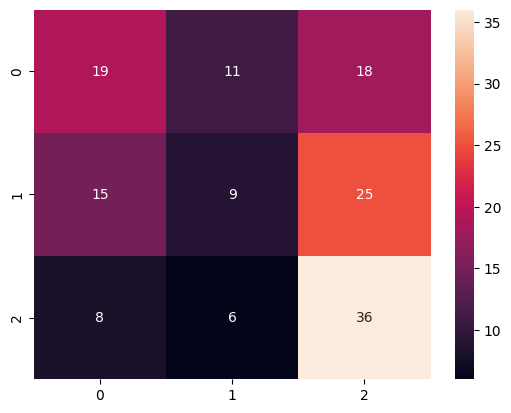

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.40      0.42        48
           1       0.35      0.18      0.24        49
           2       0.46      0.72      0.56        50

    accuracy                           0.44       147
   macro avg       0.42      0.43      0.41       147
weighted avg       0.42      0.44      0.41       147

------------------------------------------------------
Testing configuration: 2 layers, 64 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MLP: 2 layers, 64 neurons/layer, relu activation
Confusion Matrix:


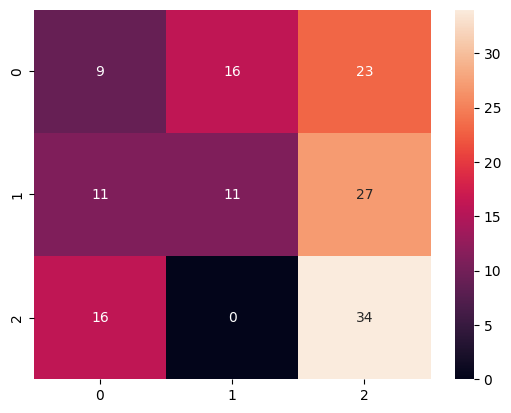

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.19      0.21        48
           1       0.41      0.22      0.29        49
           2       0.40      0.68      0.51        50

    accuracy                           0.37       147
   macro avg       0.35      0.36      0.34       147
weighted avg       0.36      0.37      0.34       147

------------------------------------------------------
Testing configuration: 2 layers, 64 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
MLP: 2 layers, 64 neurons/layer, tanh activation
Confusion Matrix:


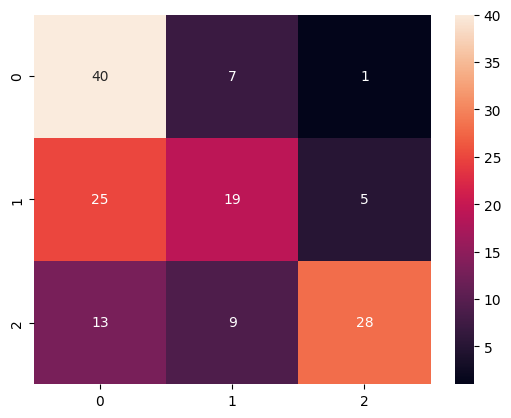

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.83      0.63        48
           1       0.54      0.39      0.45        49
           2       0.82      0.56      0.67        50

    accuracy                           0.59       147
   macro avg       0.63      0.59      0.58       147
weighted avg       0.63      0.59      0.58       147

------------------------------------------------------
Testing configuration: 2 layers, 64 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MLP: 2 layers, 64 neurons/layer, sigmoid activation
Confusion Matrix:


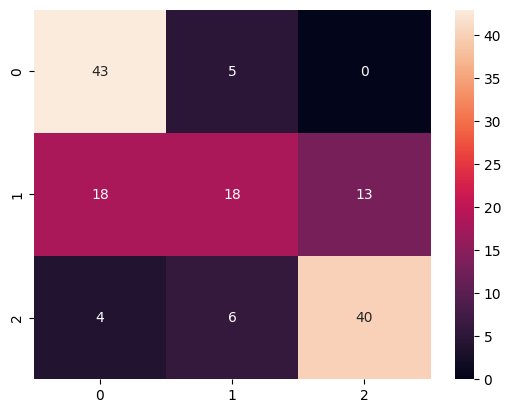

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.90      0.76        48
           1       0.62      0.37      0.46        49
           2       0.75      0.80      0.78        50

    accuracy                           0.69       147
   macro avg       0.68      0.69      0.67       147
weighted avg       0.68      0.69      0.67       147

------------------------------------------------------
Testing configuration: 3 layers, 16 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MLP: 3 layers, 16 neurons/layer, relu activation
Confusion Matrix:


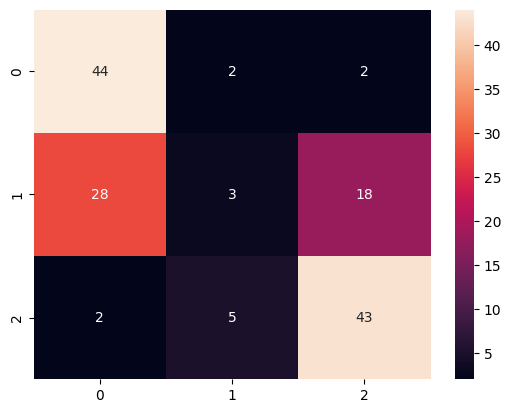

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.92      0.72        48
           1       0.30      0.06      0.10        49
           2       0.68      0.86      0.76        50

    accuracy                           0.61       147
   macro avg       0.53      0.61      0.53       147
weighted avg       0.53      0.61      0.53       147

------------------------------------------------------
Testing configuration: 3 layers, 16 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MLP: 3 layers, 16 neurons/layer, tanh activation
Confusion Matrix:


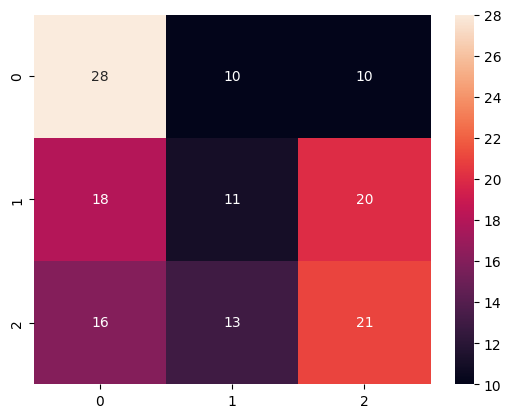

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.58      0.51        48
           1       0.32      0.22      0.27        49
           2       0.41      0.42      0.42        50

    accuracy                           0.41       147
   macro avg       0.40      0.41      0.40       147
weighted avg       0.40      0.41      0.40       147

------------------------------------------------------
Testing configuration: 3 layers, 16 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MLP: 3 layers, 16 neurons/layer, sigmoid activation
Confusion Matrix:


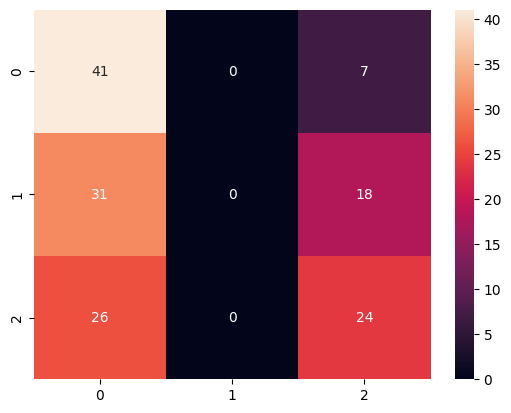

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.85      0.56        48
           1       0.00      0.00      0.00        49
           2       0.49      0.48      0.48        50

    accuracy                           0.44       147
   macro avg       0.30      0.44      0.35       147
weighted avg       0.30      0.44      0.35       147

------------------------------------------------------
Testing configuration: 3 layers, 32 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MLP: 3 layers, 32 neurons/layer, relu activation
Confusion Matrix:


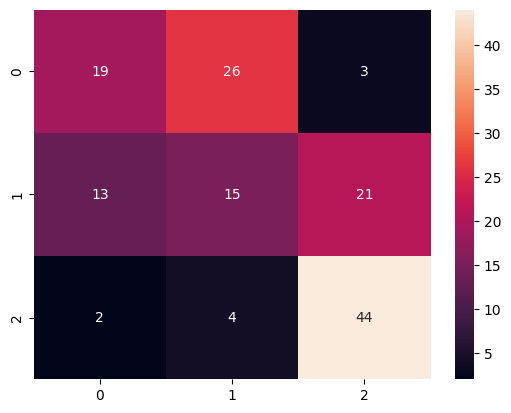

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.40      0.46        48
           1       0.33      0.31      0.32        49
           2       0.65      0.88      0.75        50

    accuracy                           0.53       147
   macro avg       0.51      0.53      0.51       147
weighted avg       0.51      0.53      0.51       147

------------------------------------------------------
Testing configuration: 3 layers, 32 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MLP: 3 layers, 32 neurons/layer, tanh activation
Confusion Matrix:


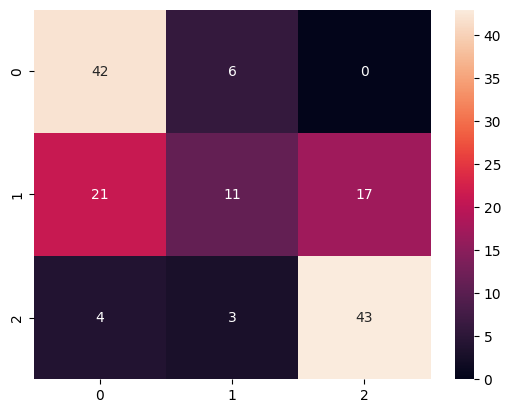

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.88      0.73        48
           1       0.55      0.22      0.32        49
           2       0.72      0.86      0.78        50

    accuracy                           0.65       147
   macro avg       0.63      0.65      0.61       147
weighted avg       0.63      0.65      0.61       147

------------------------------------------------------
Testing configuration: 3 layers, 32 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import os
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Configurações para testar
num_layers_options = [1, 2, 3]  # Número de camadas ocultas
neurons_per_layer_options = [16, 32, 64]  # Número de neurônios por camada
activation_functions = ['relu', 'tanh', 'sigmoid']  # Funções de ativação
output_activation = 'softmax'  # Função de ativação da camada de saída
learning_rate = 0.001  # Taxa de aprendizado
epochs = 50  # Número máximo de épocas
batch_size = 32  # Tamanho do lote
seed = 3
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
# Early stopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Loop para testar diferentes configurações
for num_layers in num_layers_options:
    for neurons in neurons_per_layer_options:
        for activation in activation_functions:
            print(f"Testing configuration: {num_layers} layers, {neurons} neurons/layer, {activation} activation")

            # Construção do modelo
            model = Sequential()
            model.add(Dense(neurons, input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            for _ in range(num_layers - 1):
                model.add(Dense(neurons))
                model.add(Activation(activation))
            model.add(Dense(3))  # 3 classes de saída
            model.add(Activation(output_activation))

            # Compilação do modelo
            model.compile(optimizer=Adam(learning_rate=learning_rate),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

            # Treinamento do modelo
            model.fit(X_train, y_train_encoded,
                      validation_data=(X_test, y_test_encoded),
                      epochs=epochs,
                      batch_size=batch_size,
                      callbacks=[early_stopping],
                      
                      verbose=0)

            # Avaliação do modelo
            y_predict = model.predict(X_test)
            y_predict_classes = np.argmax(y_predict, axis=1)
            y_test_classes = np.argmax(y_test_encoded, axis=1)
            title = f"MLP: {num_layers} layers, {neurons} neurons/layer, {activation} activation"
            print(title)
            results[title] = y_predict_classes
            print("Confusion Matrix:")
            sns.heatmap(confusion_matrix(y_test_classes, y_predict_classes), annot=True, fmt='d') 
            plt.show()           
            print("Classification Report:")
            print(classification_report(y_test_classes, y_predict_classes))
            print("------------------------------------------------------")

# Estatisticos

## Anova

In [158]:
from scipy.stats import f_oneway

for key_i, value_i in results.items():
    for key_j, value_j in results.items():
        if key_i != key_j:
            try:
                f_stat, p_val = f_oneway(value_i, value_j)
                print(f"Comparando {key_i} e {key_j}:")
                print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.3f}")
                if p_val < 0.05:
                    print("Diferença significativa entre os grupos.")
                else:
                    print("Sem diferença significativa entre os grupos.")
                print("-" * 50)
            except Exception as e:
                print(f"Erro ao comparar {key_i} e {key_j}: {e}")
                print("-" * 50)

Comparando MLP: 1 layers, 16 neurons/layer, relu activation e MLP: 1 layers, 16 neurons/layer, tanh activation:
F-statistic: 26.631, p-value: 0.000
Diferença significativa entre os grupos.
--------------------------------------------------
Comparando MLP: 1 layers, 16 neurons/layer, relu activation e MLP: 1 layers, 16 neurons/layer, sigmoid activation:
F-statistic: 0.602, p-value: 0.438
Sem diferença significativa entre os grupos.
--------------------------------------------------
Comparando MLP: 1 layers, 16 neurons/layer, relu activation e MLP: 1 layers, 32 neurons/layer, relu activation:
F-statistic: 4.597, p-value: 0.033
Diferença significativa entre os grupos.
--------------------------------------------------
Comparando MLP: 1 layers, 16 neurons/layer, relu activation e MLP: 1 layers, 32 neurons/layer, tanh activation:
F-statistic: 4.073, p-value: 0.044
Diferença significativa entre os grupos.
--------------------------------------------------
Comparando MLP: 1 layers, 16 neurons

## Kruskal-Wallis

In [159]:
from scipy.stats import kruskal

for key_i, value_i in results.items():
    for key_j, value_j in results.items():
        if key_i != key_j:
            try:
                # Teste de Kruskal-Wallis
                f_stat, p_val = kruskal(value_i, value_j)
                print(f"Comparando {key_i} e {key_j}:")
                print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.3f}")
                if p_val < 0.05:
                    print("Diferença significativa entre os grupos.")
                else:
                    print("Sem diferença significativa entre os grupos.")
                print("-" * 50)
            except Exception as e:
                print(f"Erro ao comparar {key_i} e {key_j}: {e}")
                print("-" * 50)

Comparando MLP: 1 layers, 16 neurons/layer, relu activation e MLP: 1 layers, 16 neurons/layer, tanh activation:
F-statistic: 27.230, p-value: 0.000
Diferença significativa entre os grupos.
--------------------------------------------------
Comparando MLP: 1 layers, 16 neurons/layer, relu activation e MLP: 1 layers, 16 neurons/layer, sigmoid activation:
F-statistic: 1.341, p-value: 0.247
Sem diferença significativa entre os grupos.
--------------------------------------------------
Comparando MLP: 1 layers, 16 neurons/layer, relu activation e MLP: 1 layers, 32 neurons/layer, relu activation:
F-statistic: 4.647, p-value: 0.031
Diferença significativa entre os grupos.
--------------------------------------------------
Comparando MLP: 1 layers, 16 neurons/layer, relu activation e MLP: 1 layers, 32 neurons/layer, tanh activation:
F-statistic: 4.344, p-value: 0.037
Diferença significativa entre os grupos.
--------------------------------------------------
Comparando MLP: 1 layers, 16 neurons

In [160]:
stats.

SyntaxError: invalid syntax (3360502589.py, line 1)